# Flow Testing Analysis Master Script

In [18]:
import pandas as pd
import numpy as np
import matplotlib
# matplotlib.use('TkAgg')  # or another interactive backend like 'TkAgg'
import matplotlib.pyplot as plt
import math 
import os
import glob
import xarray as xr 
import matplotlib.ticker as ticker
import CoolProp.CoolProp as CP
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
import re

### Choose Test and Data

In [19]:
test_type = 'flowtest_02_01_25'
pattern = 'Orifice_Test'
# Define steady state start and end times for averages 
# Initialize as NaN if no steady state is known yet (put "= float('nan')" )
'''

'''
# start_seconds = float('nan')
# end_seconds = float('nan')

steady_state_ranges = {
    "Orifice_Test1": (2.2, 4.2),  # Start and stop indices for steady state
    "Orifice_Test2": (3.5, 5),
    "Orifice_Test3": (5, 8),
    "Orifice_Test4": (5, 10),  
    "Orifice_Test5": (5, 7.5),  
    "Orifice_Test6": (5, 7),  
    "Orifice_Test7": (5, 7),  
    "Orifice_Test8": (5, 10),  
    "Orifice_Test9": (5, 7),  
    "Orifice_Test10": (5, 7),
    "Orifice_Test11": (5, 8),
    "Orifice_Test12": (6, 11),
}

# Orifice diameters in inches for each test
orifice_diameters = {
    "Orifice_Test1": 0.380,  
    "Orifice_Test2": 0.380,
    "Orifice_Test3": 0.380,
    "Orifice_Test4": 0.380,  
    "Orifice_Test5": 0.393,  
    "Orifice_Test6": 0.393,  
    "Orifice_Test7": 0.393,  
    "Orifice_Test8": 0.393,  
    "Orifice_Test9": 0.403, 
    "Orifice_Test10": 0.403,  
    "Orifice_Test11": 0.403,  
    "Orifice_Test12": 0.403,
}

### Load Data

In [20]:
Data_Folder = f"./clean_data/{test_type}/"
Sensor_Defiinitions_csv = f"./clean_data/{test_type}/SensorDefinitions_{test_type}.csv"

label_csv = pd.read_csv(Sensor_Defiinitions_csv)
sensor_channels = list(label_csv["Sensor Physical Channel"])
sensor_mapping = label_csv.set_index("Sensor Physical Channel").to_dict(orient="index")
keep_cols = sensor_channels + ["# Time"]
                               
def read_clean_data(pattern):
    files = glob.glob(f"{Data_Folder}/{pattern}*.csv") 
    if not files:
        print("No files found")
        return {}
    
    data_dfs = {}
    for file in files:
        print(f"Reading {file}")
        df = pd.read_csv(file)
        df = df[[c for c in df.columns if c in keep_cols]]
        data_dfs[os.path.basename(file)] = df

    return data_dfs

def scale_and_rename(data_dfs):
    for key, df in data_dfs.items():
        for col_name in df.columns:
            if col_name != "# Time" and col_name != "Time (s)":
                try:
                    scaling_info = sensor_mapping.get(col_name)
                    if scaling_info:
                        scaling_eq = scaling_info["Scaling Equation"]
                        sensor_name = scaling_info["Sensor Name"]
                        
                        x = np.array(df[col_name].values)
                        scaled_values = eval(scaling_eq)
                        df[col_name] = scaled_values
                        
                        df.rename(columns={col_name: sensor_name}, inplace=True)
                    else:
                        print(f"{col_name} does not have scaling Equation or name")
                except Exception as e:
                    print(f"Error processing column {col_name}: {e}")
    return data_dfs

def add_time_column(data_dfs):
    for key, df in data_dfs.items():
        start_time = df.at[df.index[0], '# Time']
        end_time = df.at[df.index[-1], '# Time']
        sample_rate = len(df['# Time']) / (end_time - start_time)
        time_arr = np.linspace(0, (end_time - start_time), len(df['# Time']))  # Convert to seconds
        df["Time (s)"] = time_arr
        data_dfs[key] = df
    return data_dfs

# Read data for 
Data_dfs = read_clean_data(pattern)
Data_dfs = add_time_column(Data_dfs)
Data_dfs = scale_and_rename(Data_dfs)

# print data for each sensor in first key of dictionary
# print(Data_dfs[list(Data_dfs.keys())[1]])

Reading ./clean_data/flowtest_02_01_25/Orifice_Test5_O2.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test9_O3.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test11_O3.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test7_O2.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test3_O1.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test1_O1.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test8_O2.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test12_O3.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test4_O1.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test6_O2.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test10_O3.csv
Reading ./clean_data/flowtest_02_01_25/Orifice_Test2_O1.csv


### Plots of everything 

['./clean_data/flowtest_02_01_25/Orifice_Test1_O1.csv']


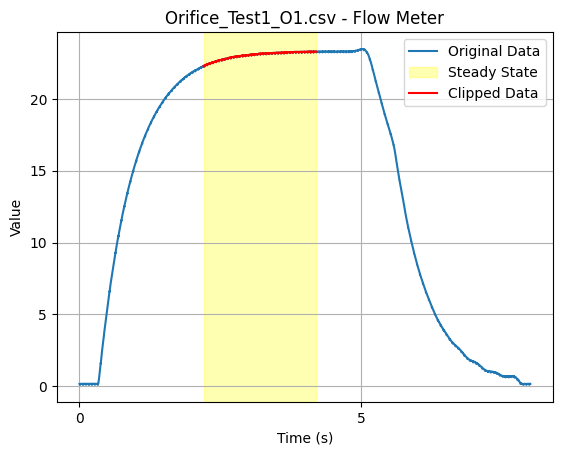

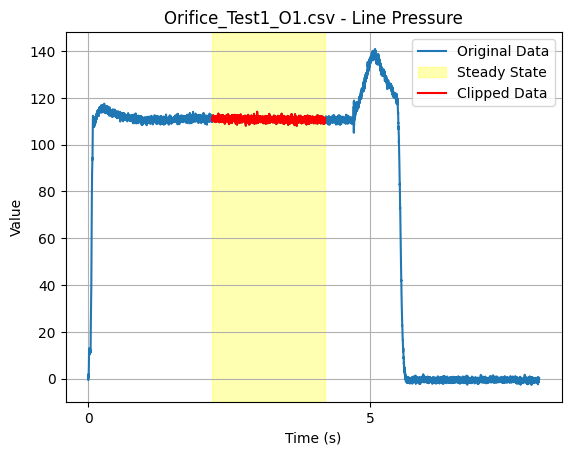

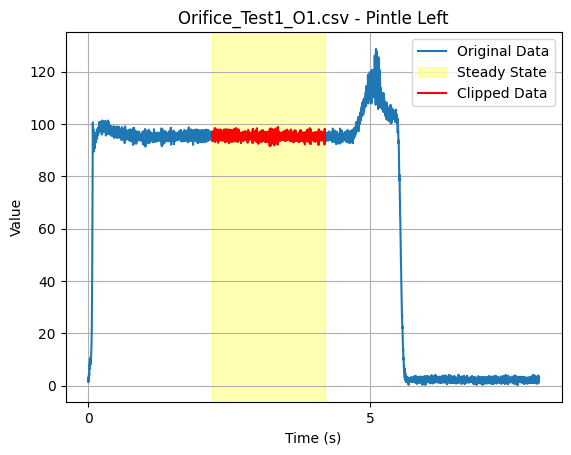

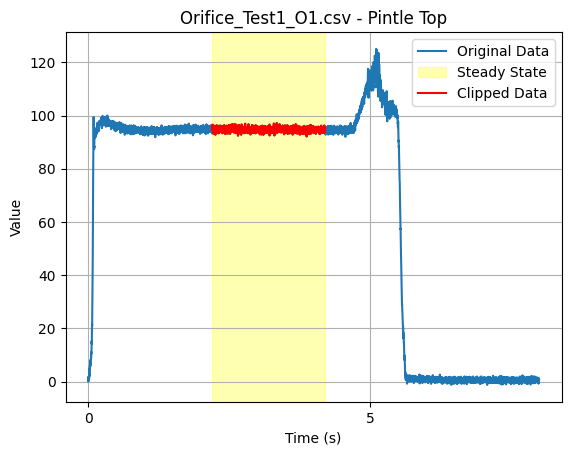

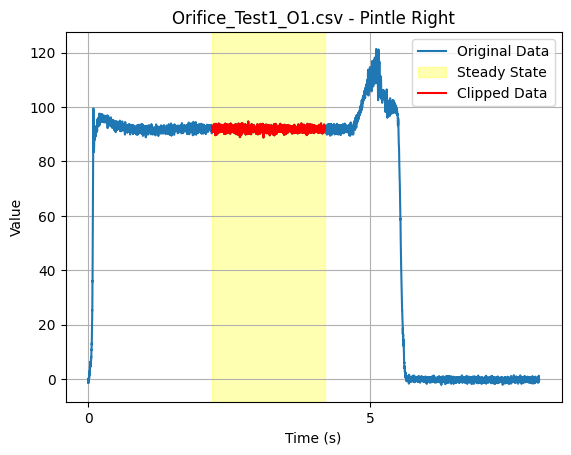

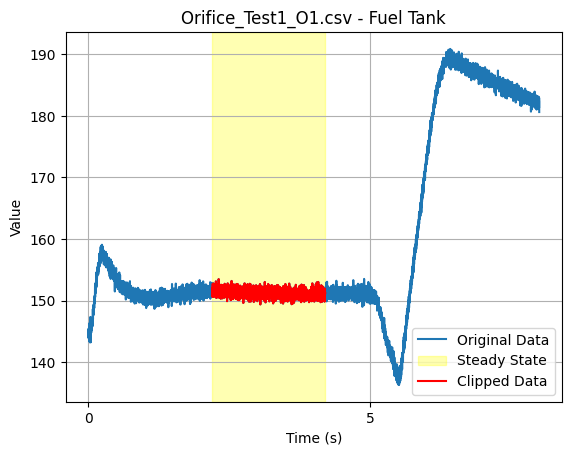

['./clean_data/flowtest_02_01_25/Orifice_Test2_O1.csv']


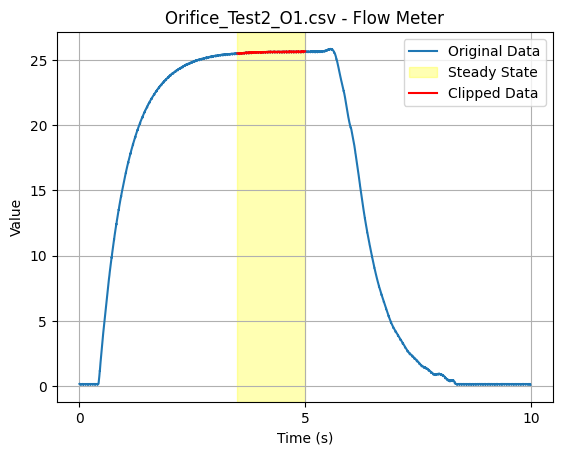

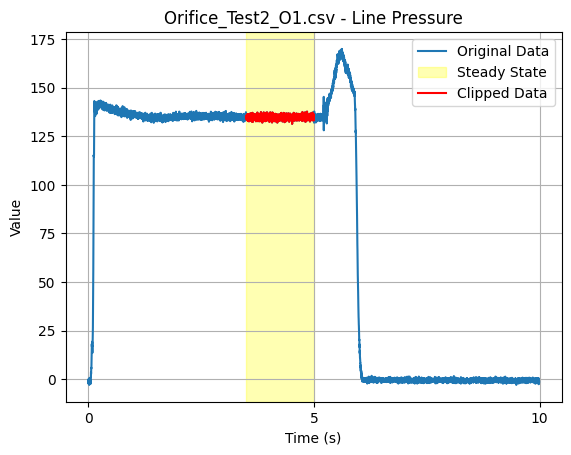

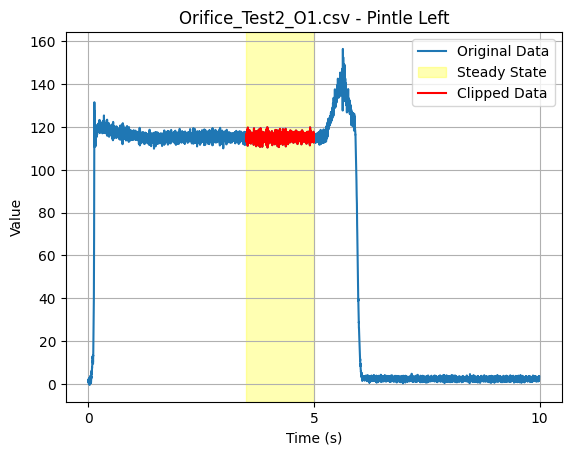

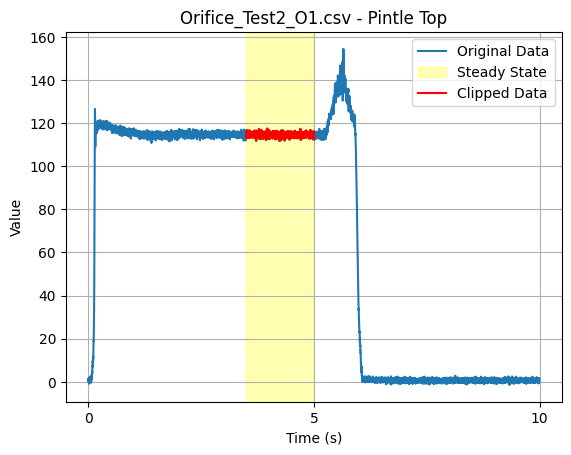

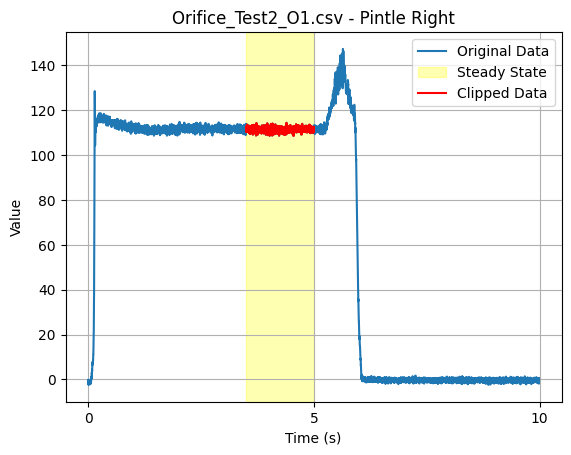

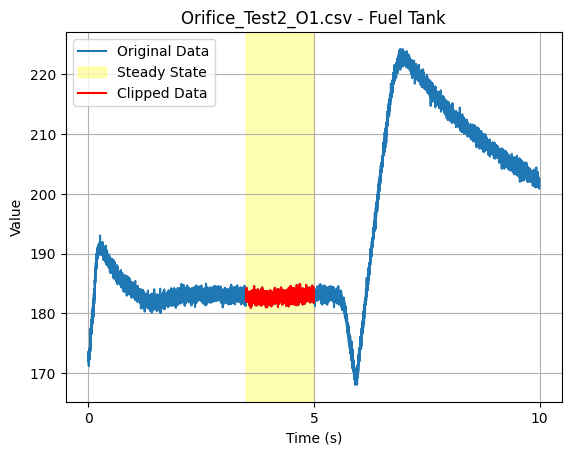

['./clean_data/flowtest_02_01_25/Orifice_Test3_O1.csv']


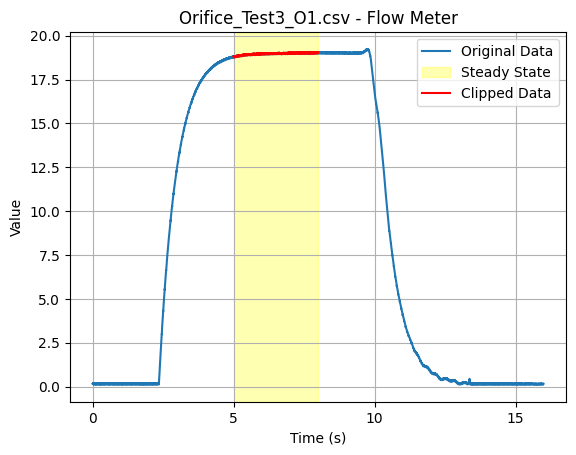

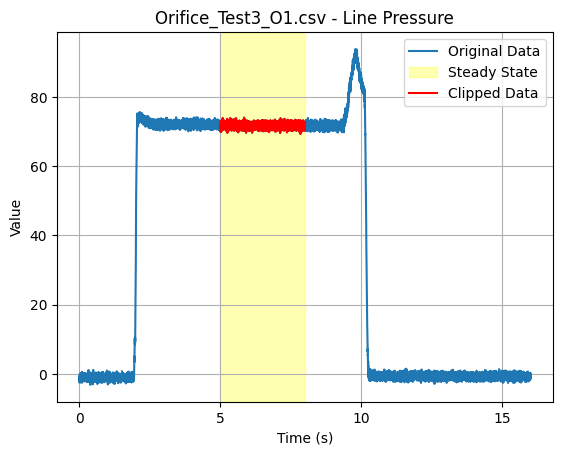

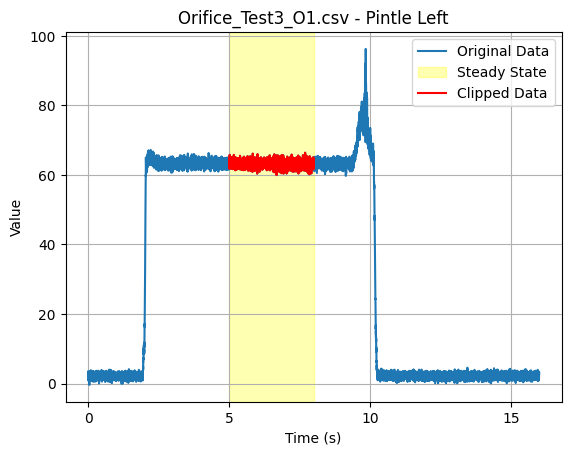

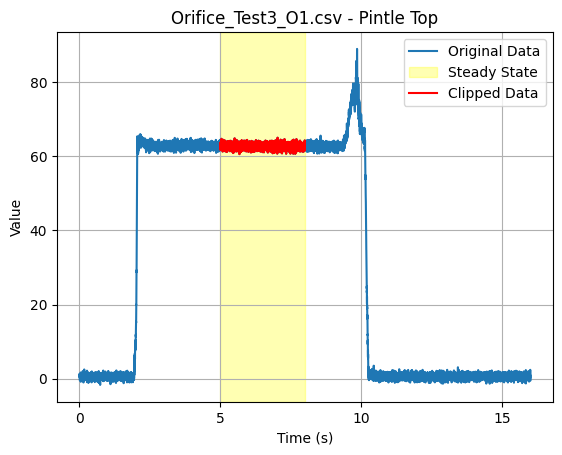

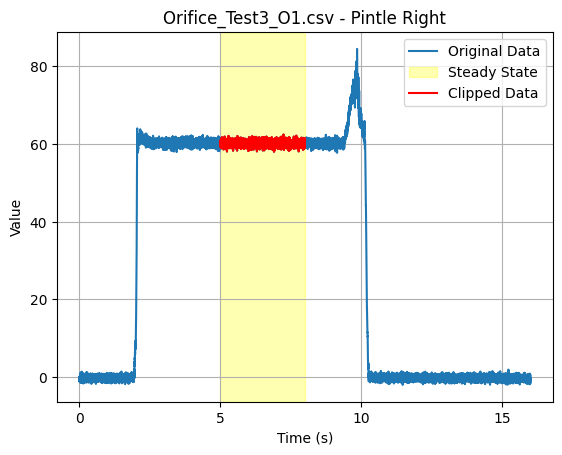

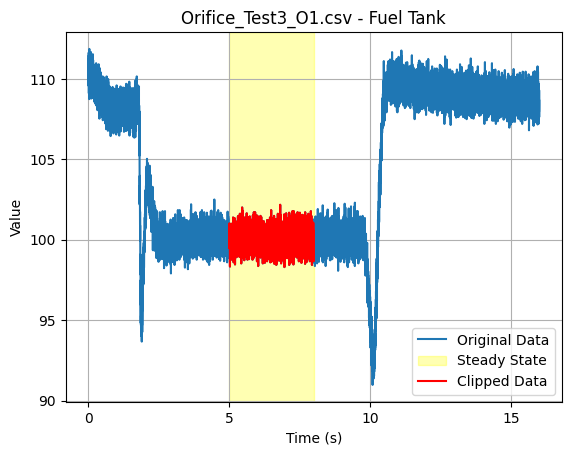

['./clean_data/flowtest_02_01_25/Orifice_Test4_O1.csv']


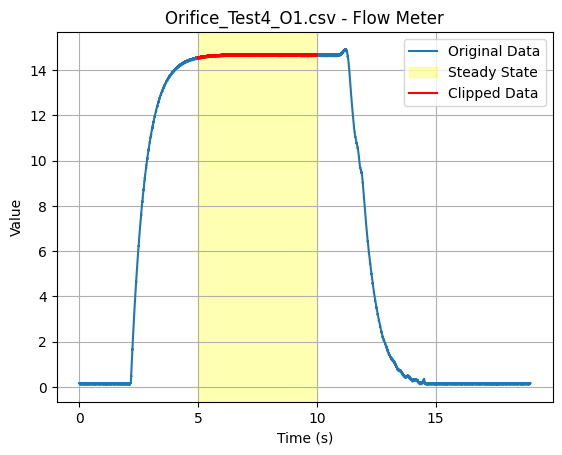

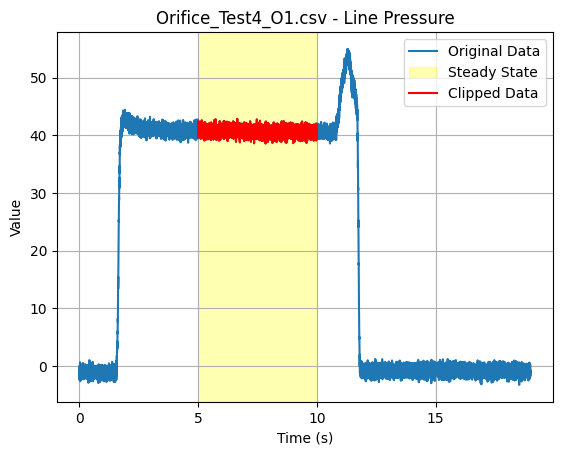

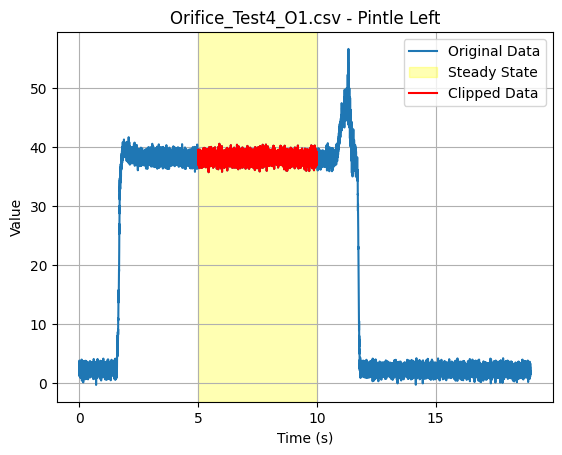

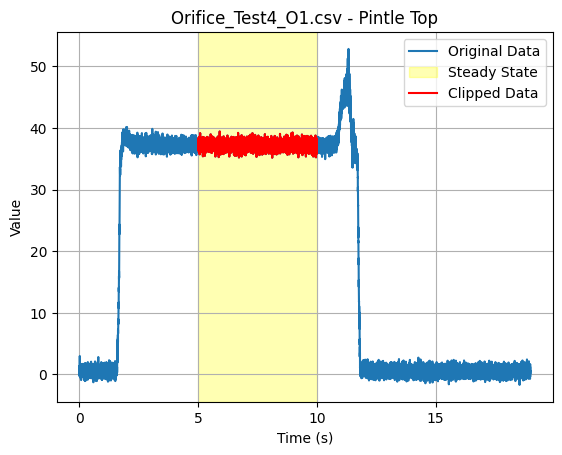

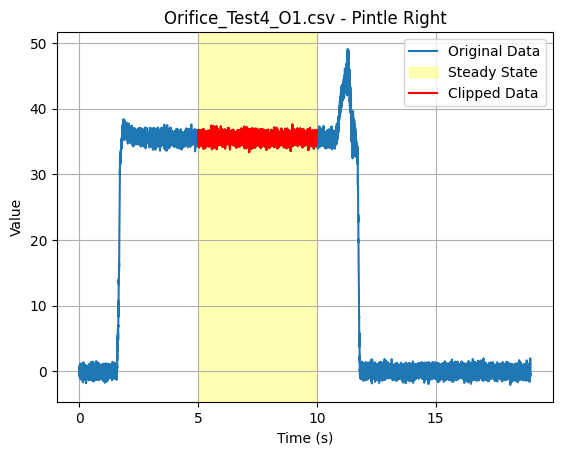

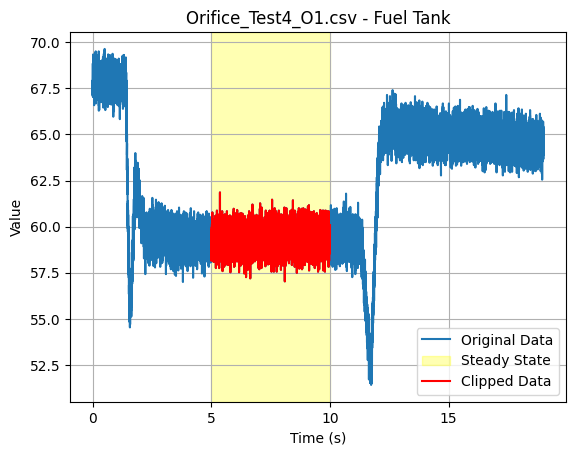

['./clean_data/flowtest_02_01_25/Orifice_Test5_O2.csv']


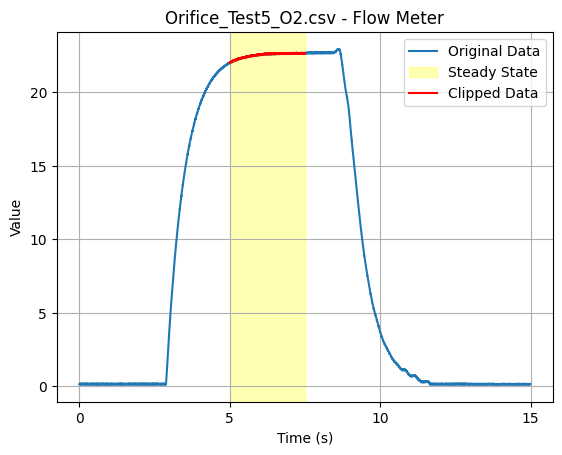

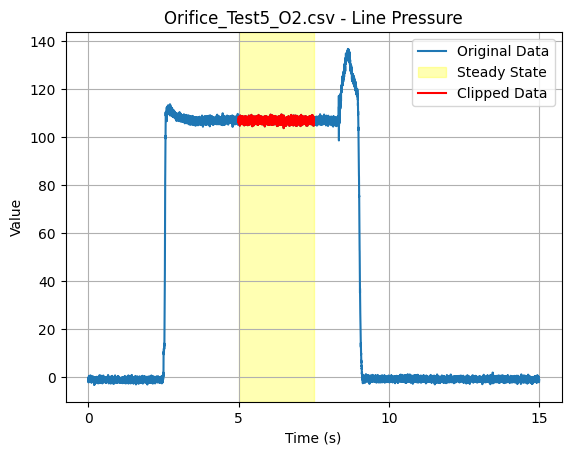

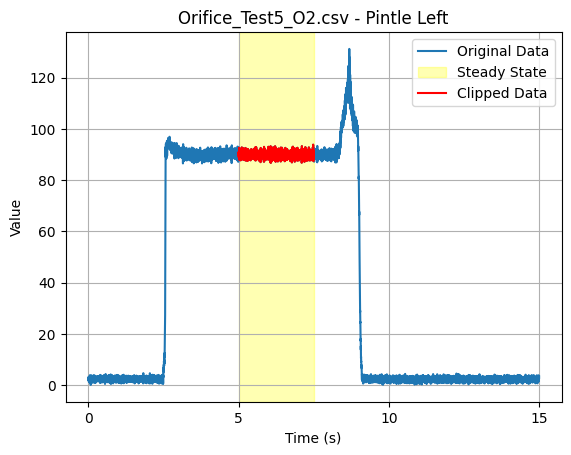

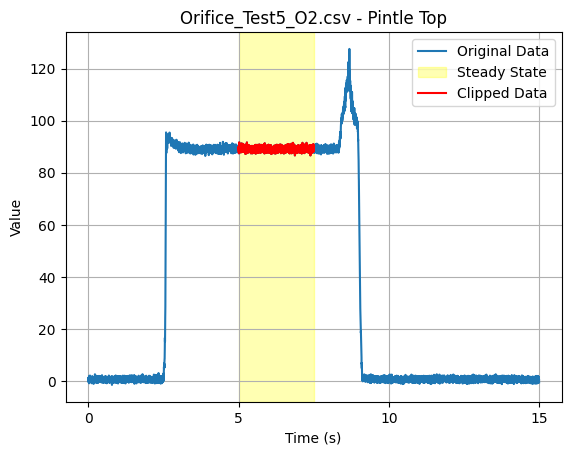

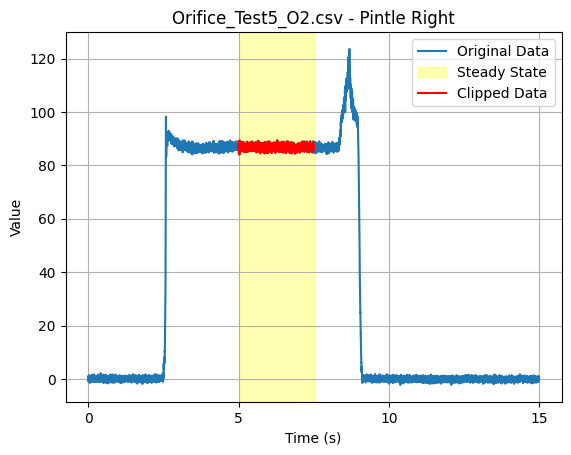

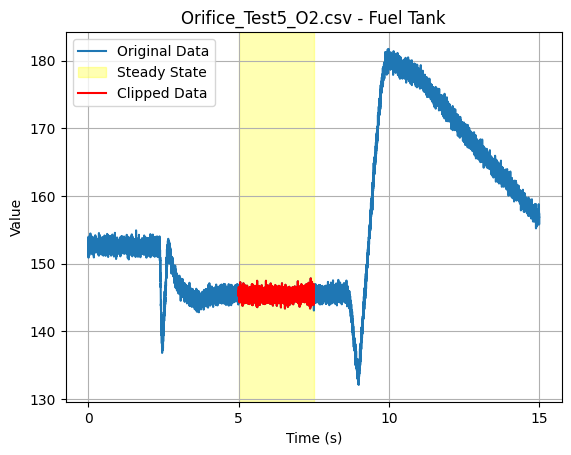

['./clean_data/flowtest_02_01_25/Orifice_Test6_O2.csv']


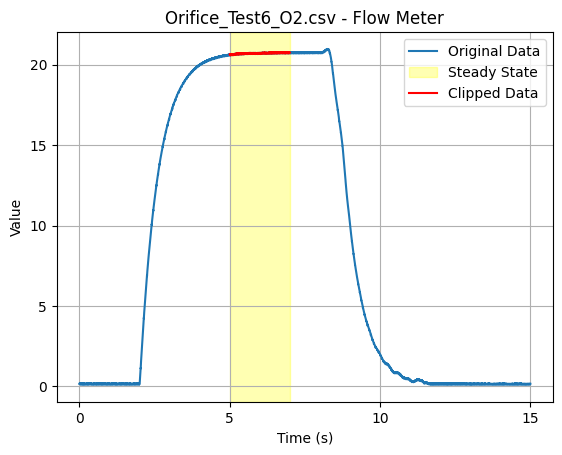

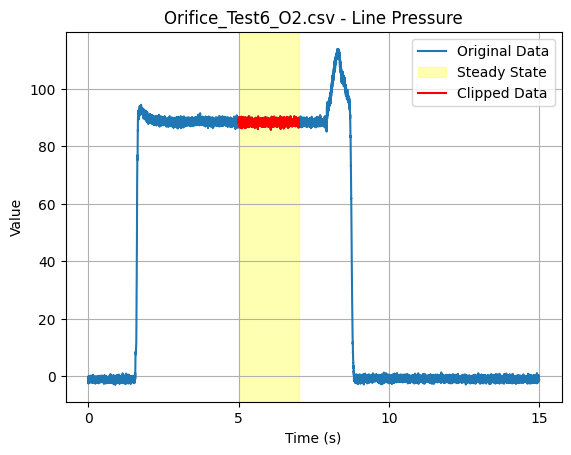

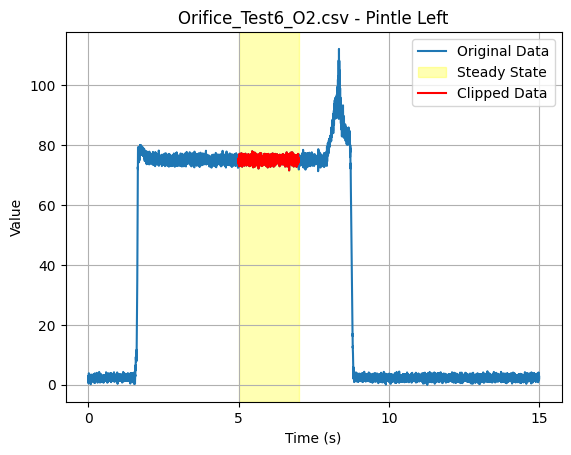

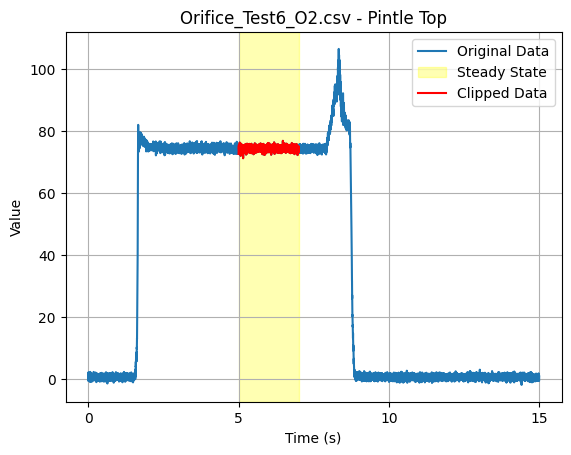

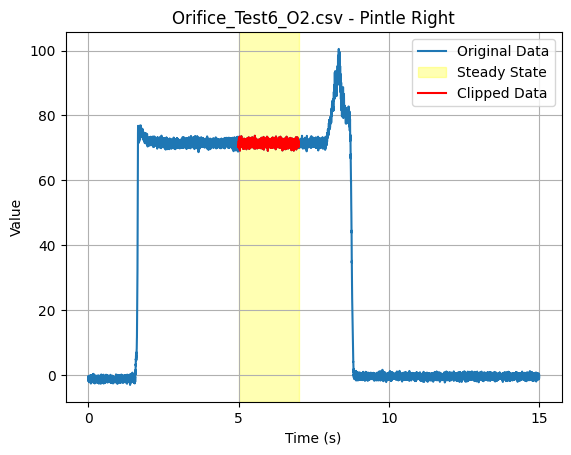

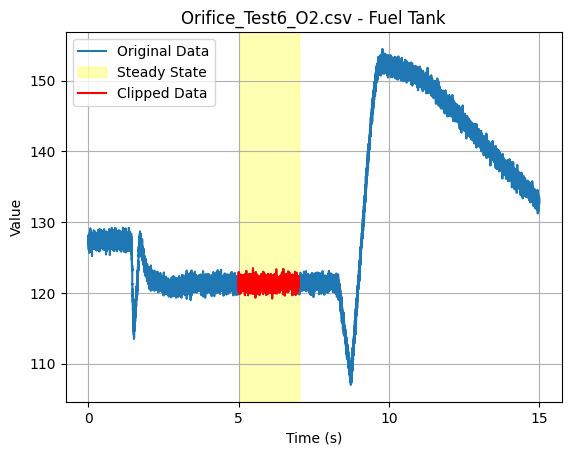

['./clean_data/flowtest_02_01_25/Orifice_Test7_O2.csv']


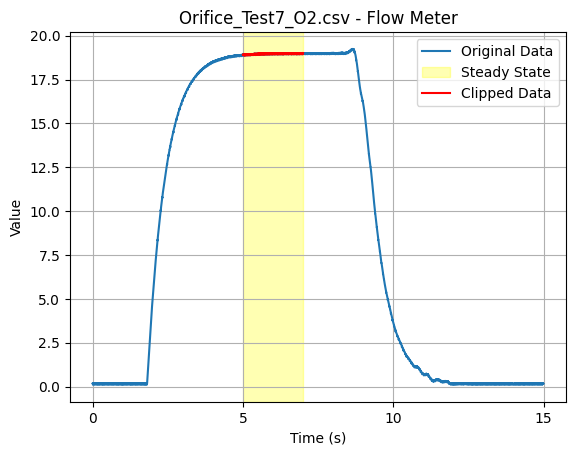

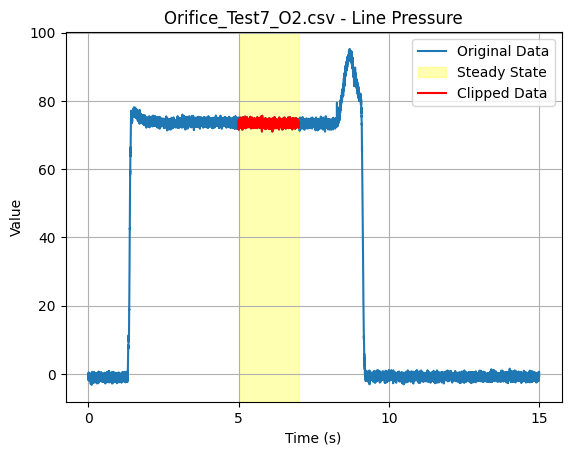

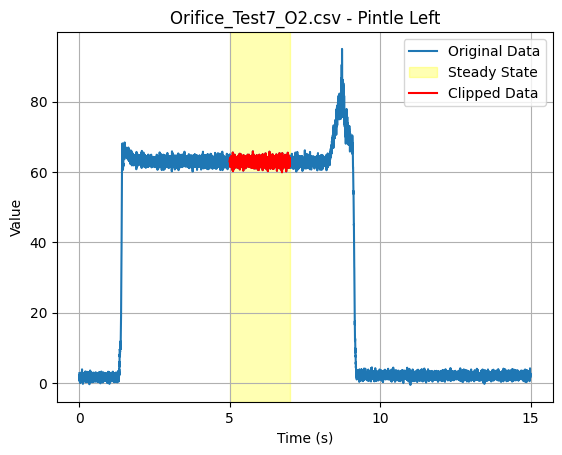

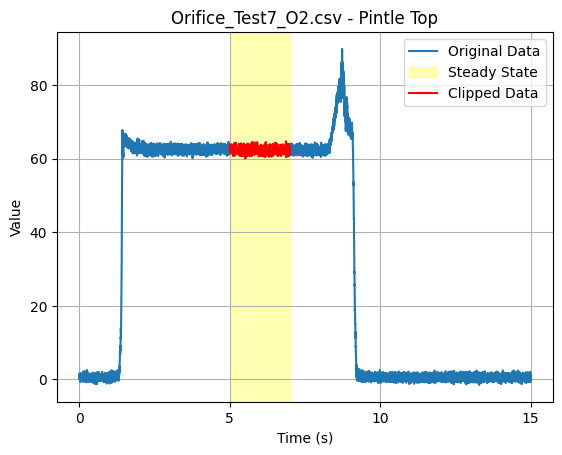

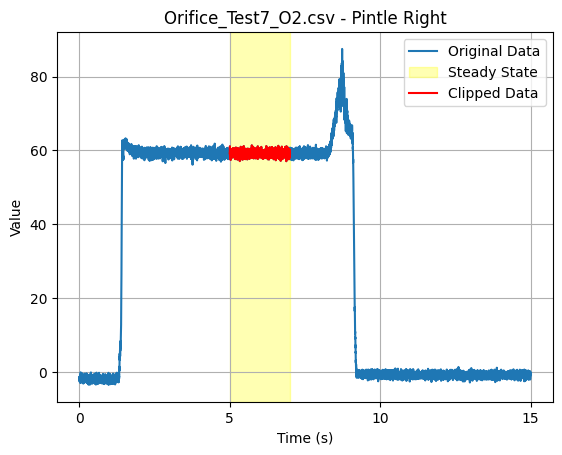

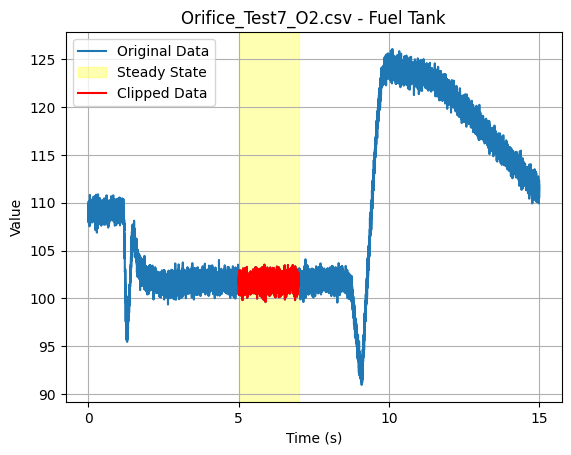

['./clean_data/flowtest_02_01_25/Orifice_Test8_O2.csv']


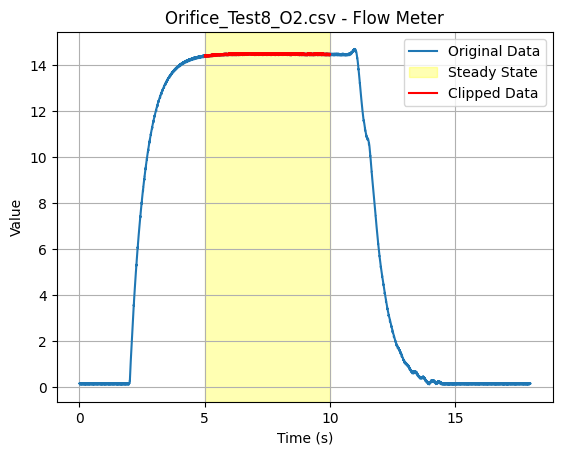

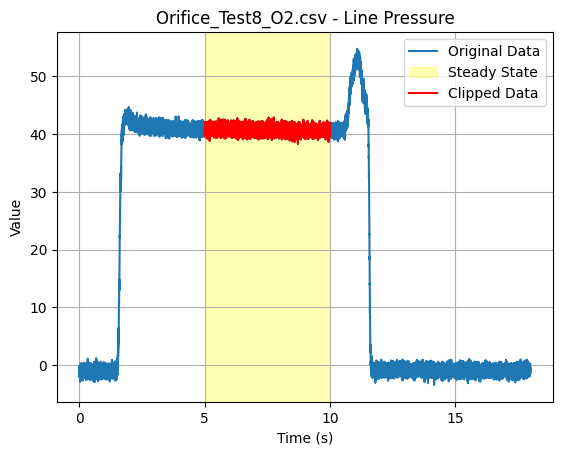

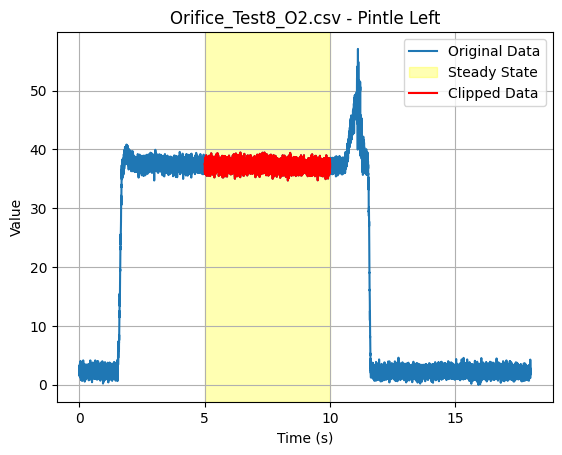

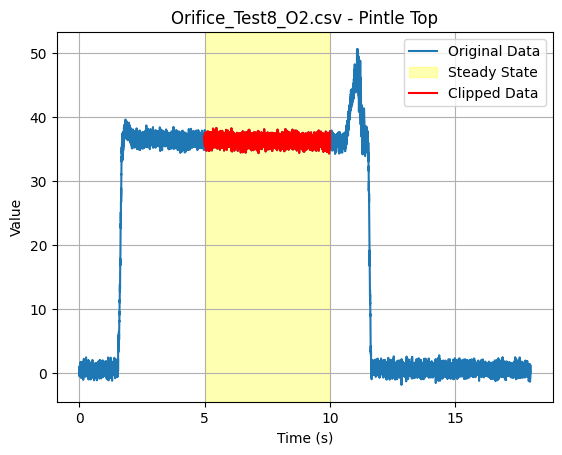

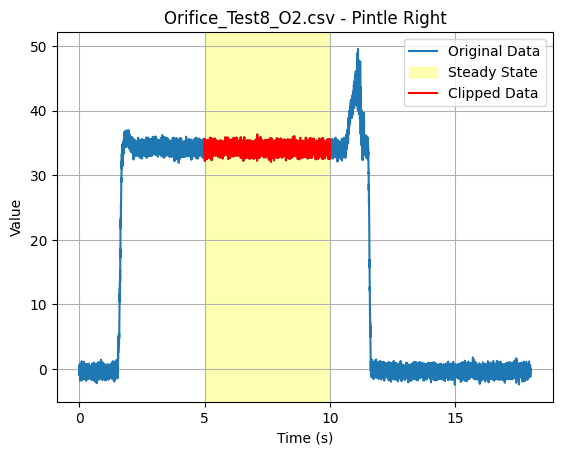

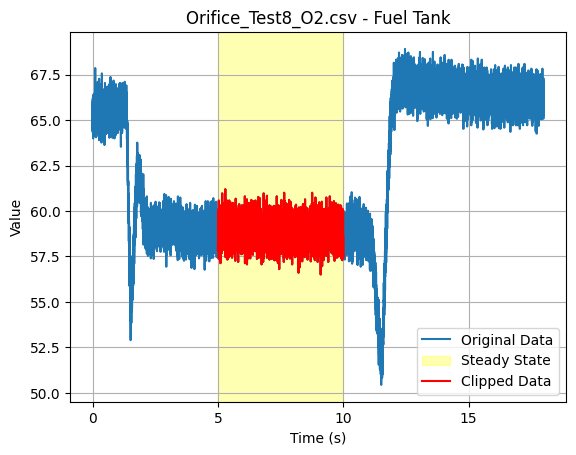

['./clean_data/flowtest_02_01_25/Orifice_Test9_O3.csv']


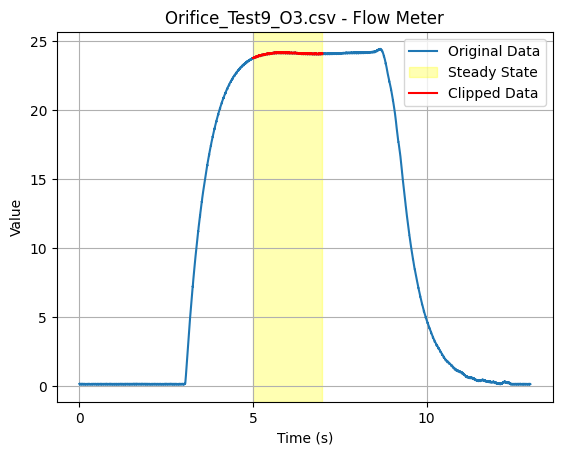

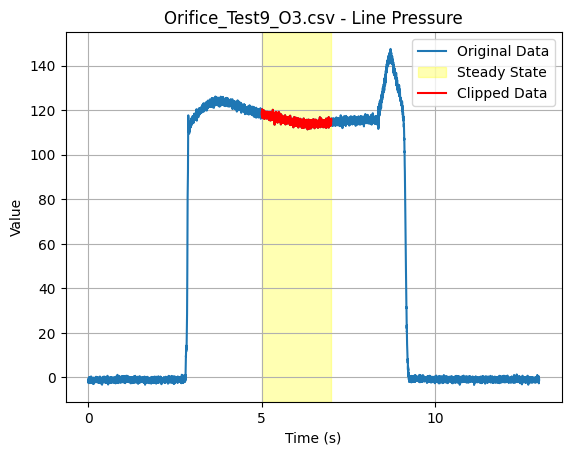

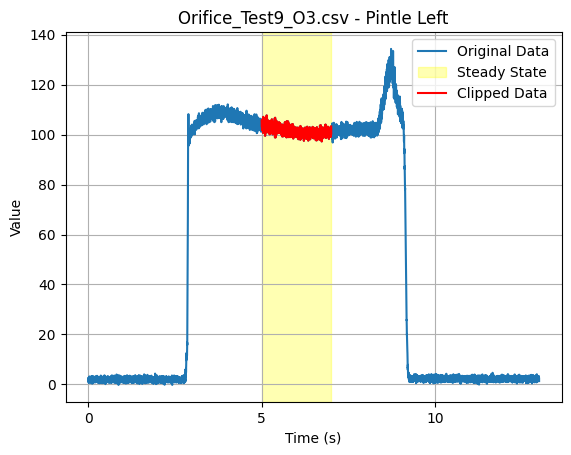

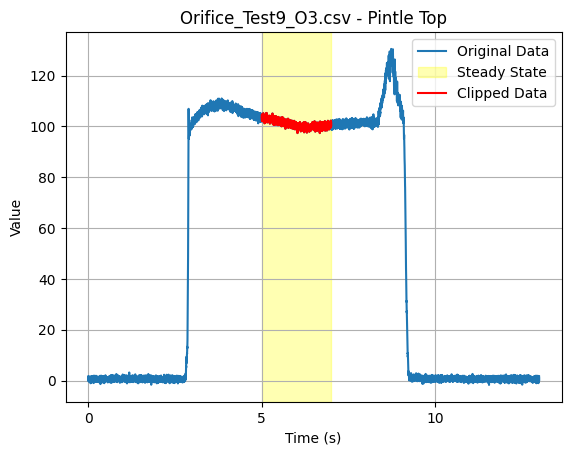

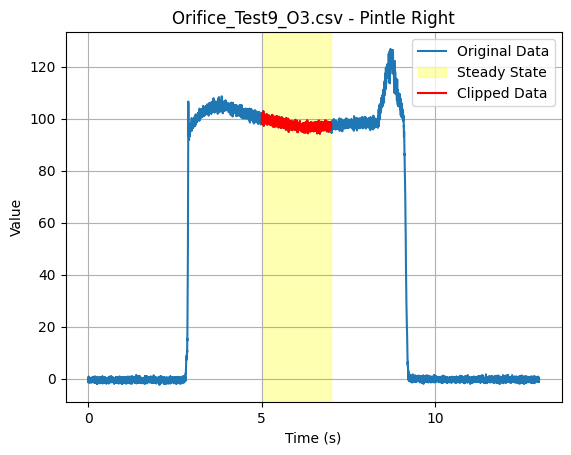

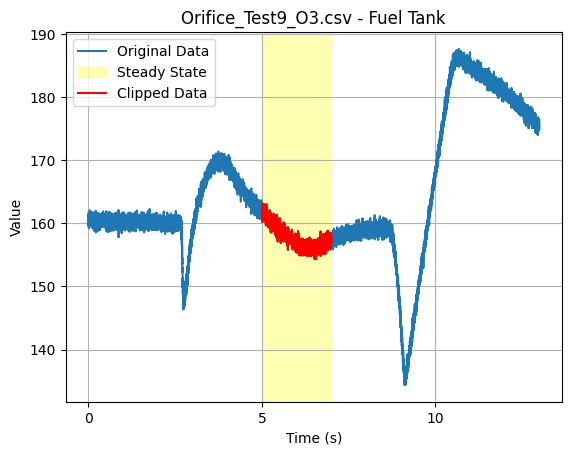

['./clean_data/flowtest_02_01_25/Orifice_Test10_O3.csv']


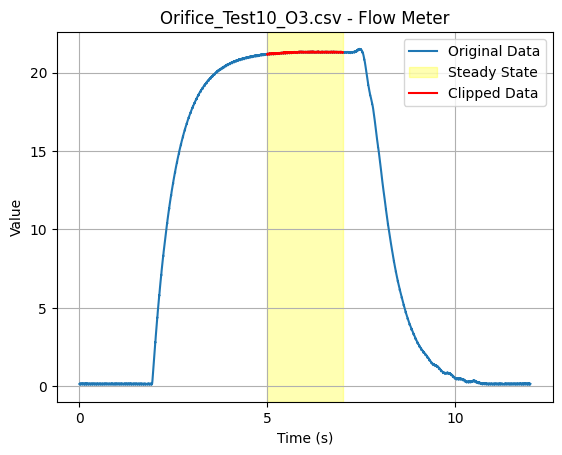

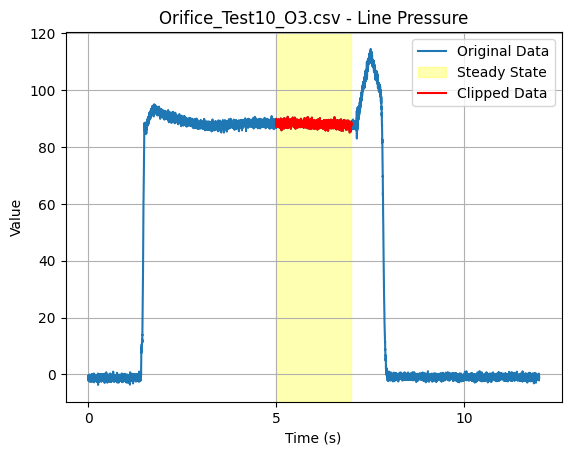

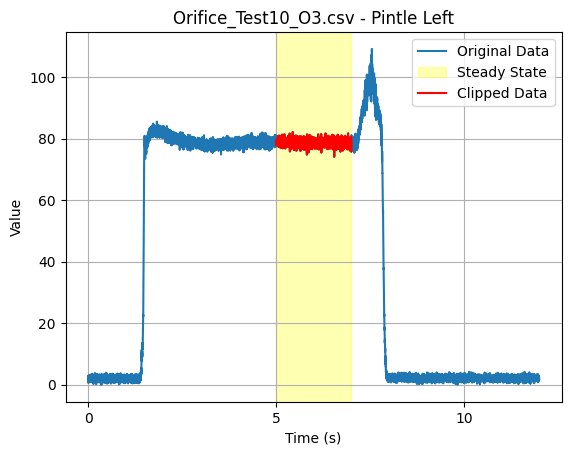

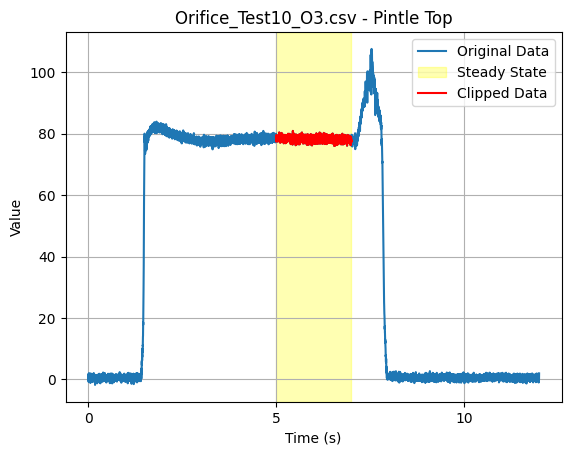

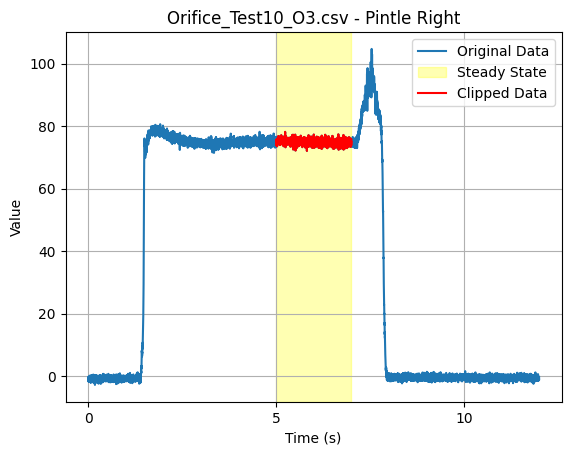

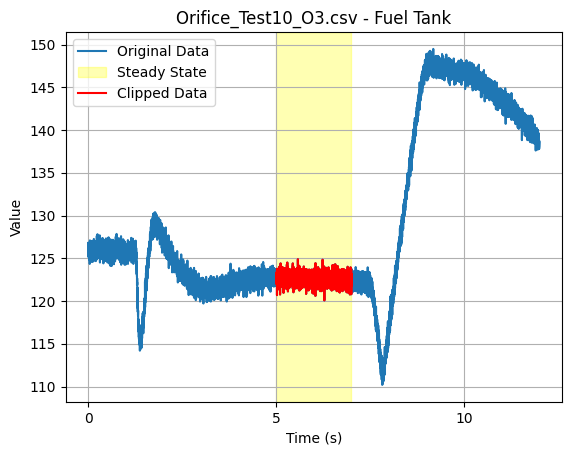

['./clean_data/flowtest_02_01_25/Orifice_Test11_O3.csv']


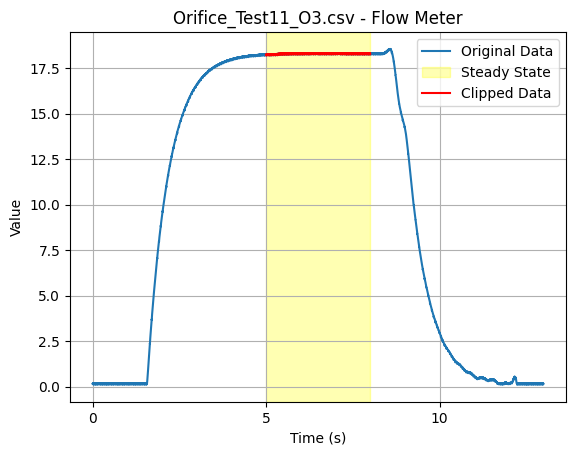

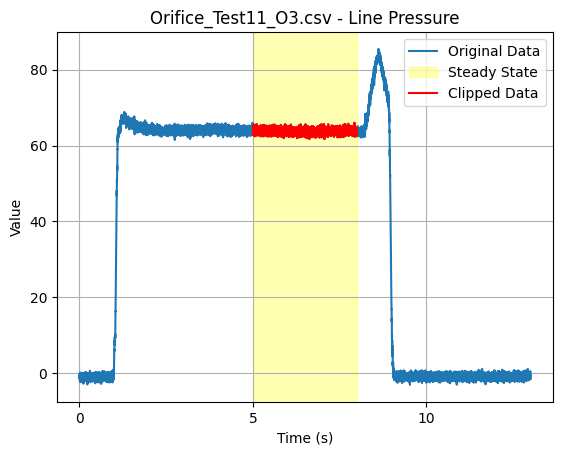

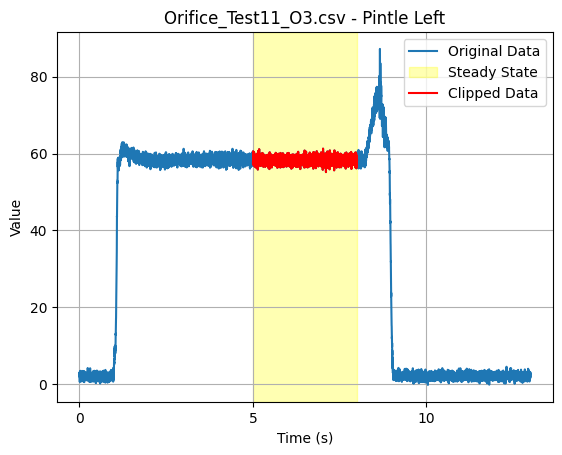

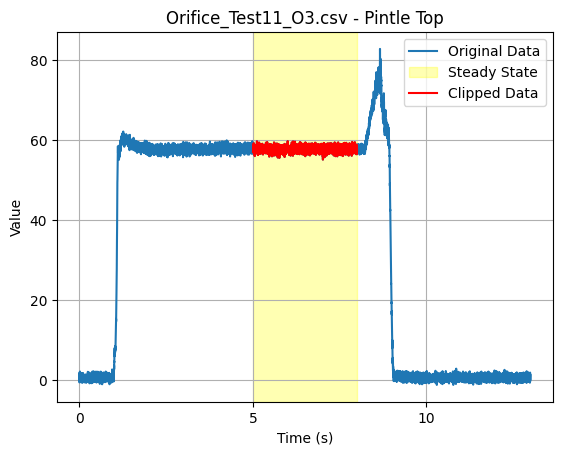

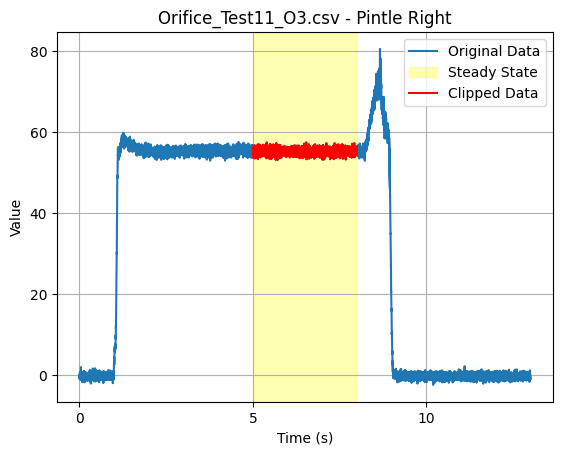

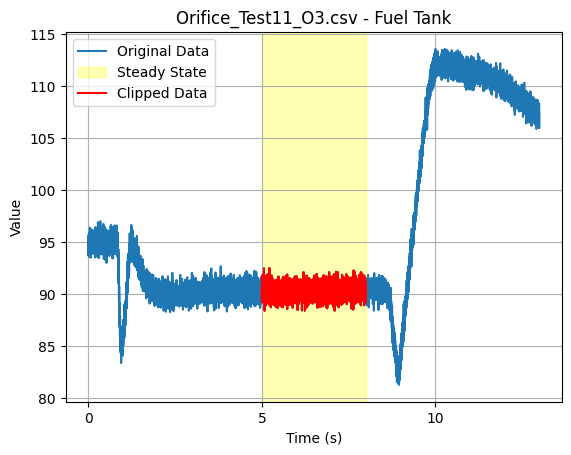

['./clean_data/flowtest_02_01_25/Orifice_Test12_O3.csv']


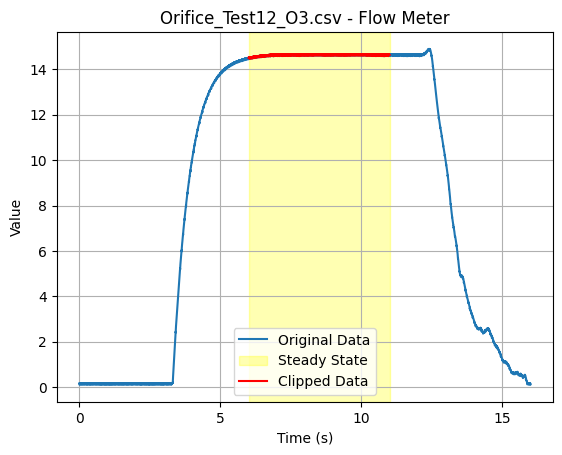

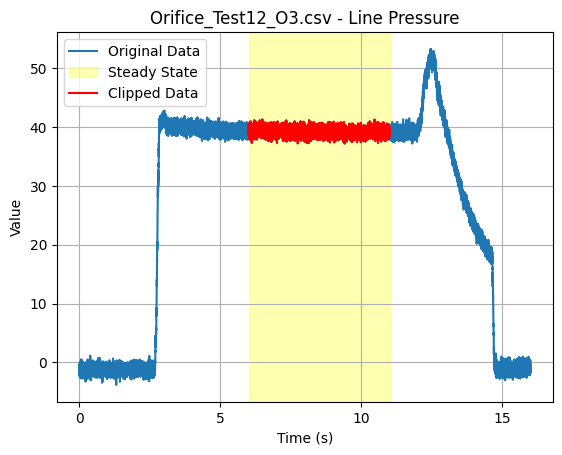

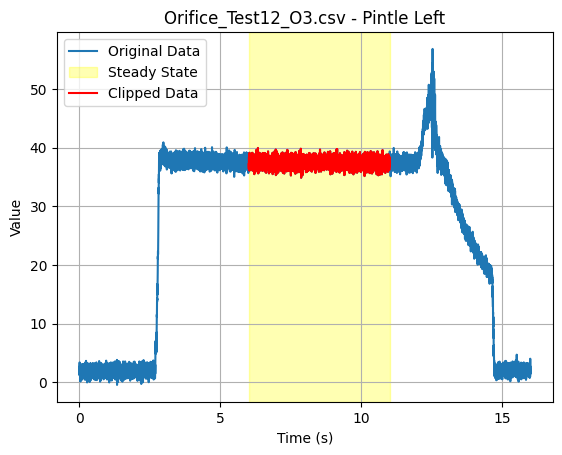

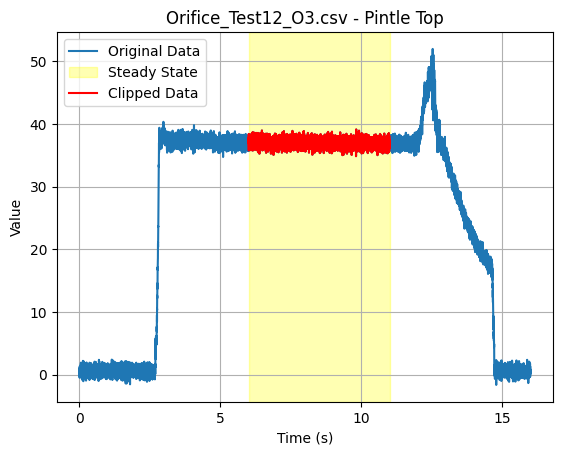

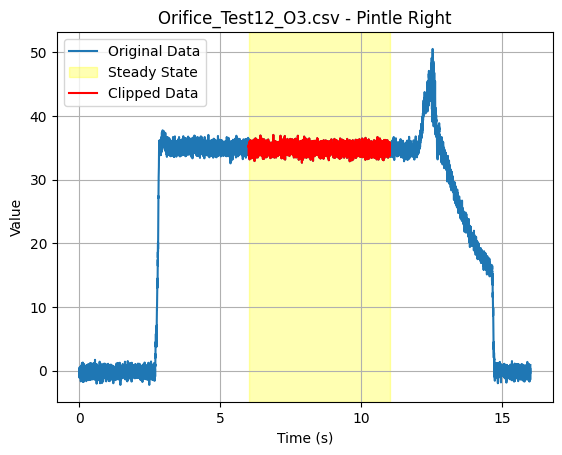

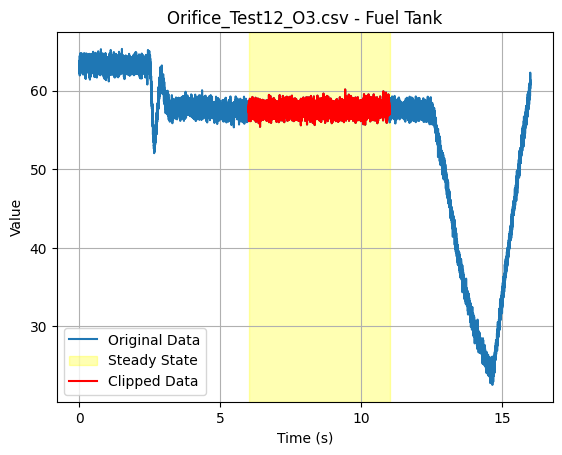

In [21]:

def get_matching_files(test_name, data_folder):
    # Compile a regex that matches filenames that:
    # - start with the exact test_name, and
    # - are either followed immediately by an underscore (e.g., _O1)
    #   or end right after test_name (i.e. '.csv' follows immediately).
    pattern = re.compile(r'^' + re.escape(test_name) + r'($|_.*\.csv$)')
    
    # Get all CSV files in the folder
    all_files = glob.glob(os.path.join(data_folder, "*.csv"))
    
    # Filter using the regex on the basename of each file
    matching = [f for f in all_files if pattern.match(os.path.basename(f))]
    return matching

def clip_and_plot(data_dfs, steady_state_ranges):
    clipped_dfs = {}
    # output_folder = "./clipped_data/"
    # os.makedirs(output_folder, exist_ok=True)
    
    # Iterate over keys in steady_state_ranges and use glob to find matching files
    for test_name, (start, stop) in steady_state_ranges.items():
        matching_files = get_matching_files(test_name, Data_Folder)
        print(matching_files)
        if not matching_files:
            print(f"No files found for pattern: {test_name}")
            continue

        for file in matching_files:
            key = os.path.basename(file)
            if key not in data_dfs:
                print(f"{key} not in loaded DataFrames, skipping.")
                continue
            
            df = data_dfs[key]            
            # Clip data based on start and stop
            if start is None or stop is None:
                clipped_df = df  # Use entire DataFrame if no range is specified
            else:
                clipped_df = df[(df["Time (s)"] >= start) & (df["Time (s)"] <= stop)]
            
            clipped_dfs[key] = clipped_df

            # Plot each column with highlighted steady-state range
            data_df = df.drop(columns=["# Time", "Time (s)"])
            for col in data_df.columns:
                plt.figure()
                plt.plot(df["Time (s)"], df[col], label="Original Data")
                if start is not None and stop is not None:
                    plt.axvspan(start, stop, color="yellow", alpha=0.3, label="Steady State")
                    plt.plot(clipped_df["Time (s)"], clipped_df[col], label="Clipped Data", color="red")
                plt.title(f"{key} - {col}")
                plt.xlabel("Time (s)")
                plt.ylabel("Value")
                plt.grid()
                plt.legend()
                ax = plt.gca()
                ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
                plt.show()  
                # plt.savefig(f"{output_folder}{key}_{col}.png")
            # Save clipped DataFrame for further analysis
            # clipped_df.to_csv(f"{output_folder}{key}_clipped.csv", index=False)
    
    return clipped_dfs

# Call the function to process files
Clipped_dfs = clip_and_plot(Data_dfs, steady_state_ranges)


### Calc Stats

In [22]:
# Rando stuff

# Define function to calculate mass flow rate from volumetric flow rate
def gpm_to_mdot(gpm):
    gpm_to_m3s = gpm * 0.00378541 / 60.0
    density = CP.PropsSI('D', 'T', 288.7, 'P', 101325, 'Water')
    mdot = gpm_to_m3s * density
    return mdot

# Define moving average function
def moving_average(data, window_size):
    return data.rolling(window=window_size, center=True).mean()


### Use the following for orifice no pintle config

In [23]:
# Process and plot orifices
def process_and_plot_orifices_no_pintle(clipped_dfs, orifice_diameters, window_size=50):
    try:
        avg_cds = np.array([])
        avg_cvs = np.array([])
        avg_dps = np.array([])
        avg_mdots = np.array([])

        for test_name, (start, stop) in steady_state_ranges.items():
            matching_files = glob.glob(f"{Data_Folder}/{test_name}*.csv")
            if not matching_files:
                print(f"No files found for pattern: {test_name}")
                continue

            for file in matching_files:
                key = os.path.basename(file)
                if key not in clipped_dfs:
                    print(f"No matching DataFrame for {key}, skipping.")
                    continue

                df = clipped_dfs[key].copy()

                diameter = orifice_diameters.get(test_name, None)
                if diameter is None:
                    print(f"No orifice diameter defined for {test_name}, skipping.")
                    continue
                
                # Convert diameter to meters and calculate area
                diameter_m = diameter * 0.0254  # Convert inches to meters
                area = math.pi * (diameter_m / 2) ** 2

                # Calculate pressure difference (convert PSI to Pa)
                df.loc[:, "Pressure Difference (psi)"] = (df["Pre Orifice PT"] - df["Post Orifice PT"])
                df.loc[:, "Pressure Difference (Pa)"] = df["Pressure Difference (psi)"] * 6894.76

                # Convert Flow Meter GPM to Mass Flow Rate (kg/s)
                df.loc[:, "Mass Flow Rate (kg/s)"] = df["Flow Meter"].apply(gpm_to_mdot)

                # Density of water at ambient conditions
                density = CP.PropsSI('D', 'T', 294.15, 'P', 101325, 'Water') # kg/s

                # Calculate Cd and Cv
                df.loc[:, "Cd"] = df["Mass Flow Rate (kg/s)"] / (area * np.sqrt(2 * density * df["Pressure Difference (Pa)"]))
                df.loc[:, "Cv"] = df["Flow Meter"] / np.sqrt(df["Pressure Difference (psi)"] / 1)

                # Smooth the data using a moving average
                df.loc[:, "Smoothed Pressure Difference (psi)"] = moving_average(df["Pressure Difference (psi)"], window_size)
                df.loc[:, "Smoothed Mass Flow Rate (kg/s)"] = moving_average(df["Mass Flow Rate (kg/s)"], window_size)

                # Plot Pressure Difference and Mass Flow Rate
                fig, ax1 = plt.subplots()

                # Plot Smoothed Pressure Difference
                ax1.plot(df["Time (s)"], df["Smoothed Pressure Difference (psi)"], 'b-', label="Pressure Difference (PSI)")
                ax1.set_xlabel("Time (s)")
                ax1.set_ylabel("Pressure Difference (PSI)", color='b')
                ax1.tick_params(axis='y', labelcolor='b')
                ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))

                # Plot Smoothed Mass Flow Rate on Secondary Axis
                ax2 = ax1.twinx()
                ax2.plot(df["Time (s)"], df["Smoothed Mass Flow Rate (kg/s)"], 'r-', label="Mass Flow Rate")
                ax2.set_ylabel("Mass Flow Rate (kg/s)", color='r')
                ax2.tick_params(axis='y', labelcolor='r')
                
                plt.title(f"{key} - Pressure Difference and Mass Flow Rate")
                fig.tight_layout()
                plt.grid()
                plt.show()

                # Print Average Cd, Cv, and Pressure Difference
                avg_cd = df["Cd"].mean()
                avg_cv = df["Cv"].mean()
                avg_dp = df["Pressure Difference (psi)"].mean()

                print(f"{key}: \n Average Cd: {avg_cd:.4f} \n Average Cv: {avg_cv:.4f} \n Average Pressure Difference: {avg_dp:.4f} psi")
                avg_cds = np.append(avg_cds, avg_cd)
                avg_cvs = np.append(avg_cvs, avg_cv)
                avg_dps = np.append(avg_dps, avg_dp)
                avg_mdots = np.append(avg_mdots, df["Mass Flow Rate (kg/s)"].mean())
    except Exception as e:
        print(f"Error processing {key}: {e}")

    return avg_cds, avg_cvs, avg_dps, avg_mdots

# Call the function to process files
avg_cds, avg_cvs, avg_dps, avg_mdots = process_and_plot_orifices_no_pintle(Clipped_dfs, orifice_diameters, window_size=3000)

Error processing Orifice_Test11_O3.csv: 'Pre Orifice PT'


### Use the following for test pintle and orifice config

4.7931780318196633e-05
5.053657176928476e-05


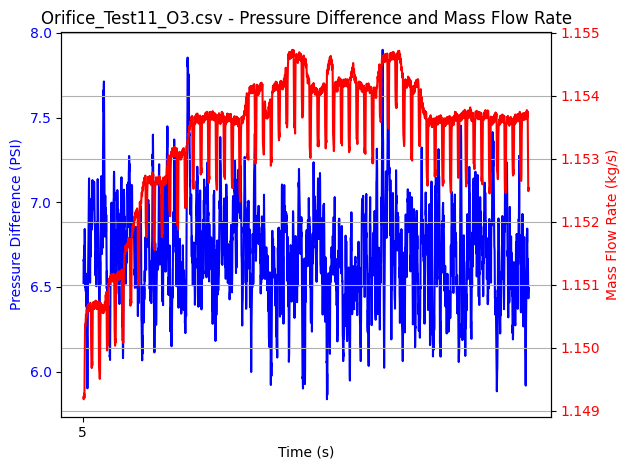

=== Orifice_Test11_O3.csv (Orifice) ===
 Average Cd: 1.6509
 Average Cv: 7.1134
 Average Pressure Difference: 6.6876 psi
 Average Mass Flow Rate: 1.1533 kg/s

=== Orifice_Test11_O3.csv (Injector) ===
 Average Cd (Injector): 0.8138
 Average Cv (Injector): 2.4217
 Average Pressure Difference (Injector): 57.0918 psi
 Average Mass Flow Rate: 1.1533 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.9146671490307853


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


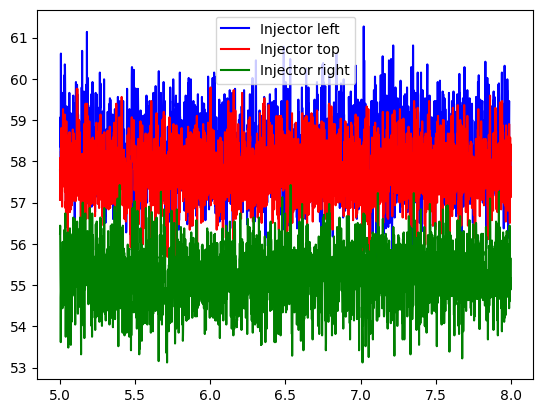

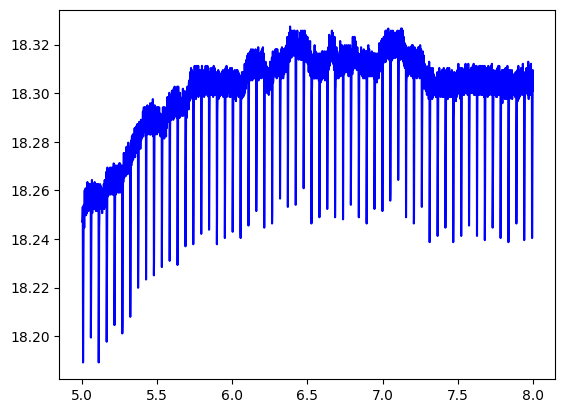

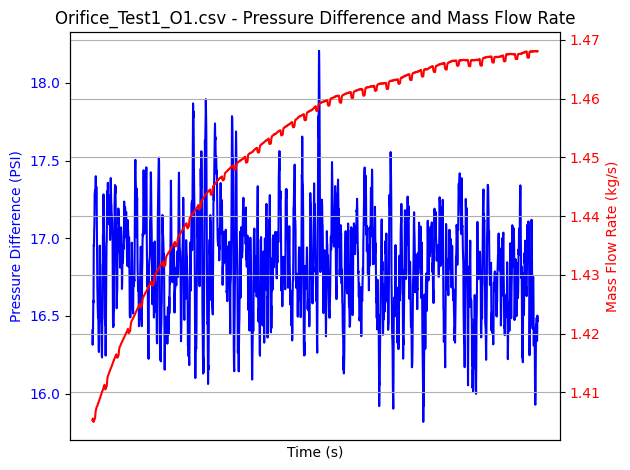

=== Orifice_Test1_O1.csv (Orifice) ===
 Average Cd: 1.3049
 Average Cv: 5.6226
 Average Pressure Difference: 16.8215 psi
 Average Mass Flow Rate: 1.4515 kg/s

=== Orifice_Test1_O1.csv (Injector) ===
 Average Cd (Injector): 0.7983
 Average Cv (Injector): 2.3758
 Average Pressure Difference (Injector): 93.9678 psi
 Average Mass Flow Rate: 1.4515 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.7673528653617179


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes
/Users/santiagoulloa/Desktop/RP_PROP/Analysis Scripts/propulsion_analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/santiagoulloa/Desktop/RP_PROP/Analysis Scripts/propulsion_analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


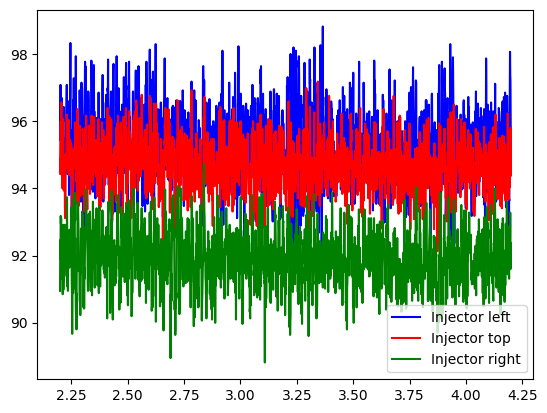

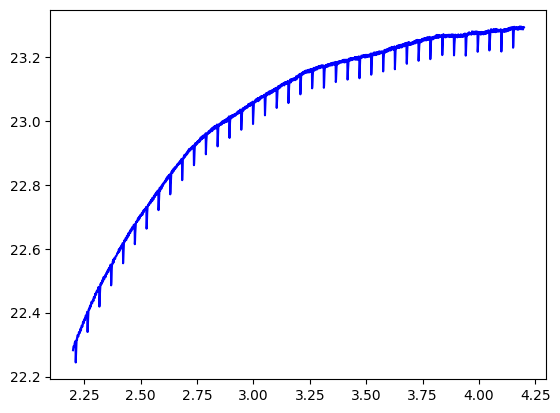

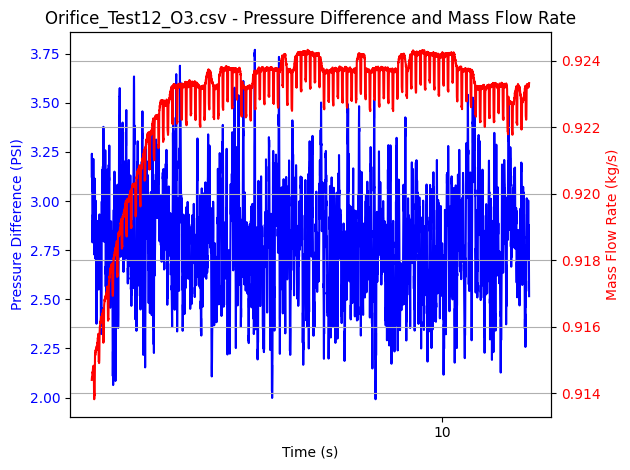

=== Orifice_Test12_O3.csv (Orifice) ===
 Average Cd: 2.0934
 Average Cv: 9.0199
 Average Pressure Difference: 2.7993 psi
 Average Mass Flow Rate: 0.9228 kg/s

=== Orifice_Test12_O3.csv (Injector) ===
 Average Cd (Injector): 0.8152
 Average Cv (Injector): 2.4261
 Average Pressure Difference (Injector): 36.4196 psi
 Average Mass Flow Rate: 0.9228 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 1.2198669993824098


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


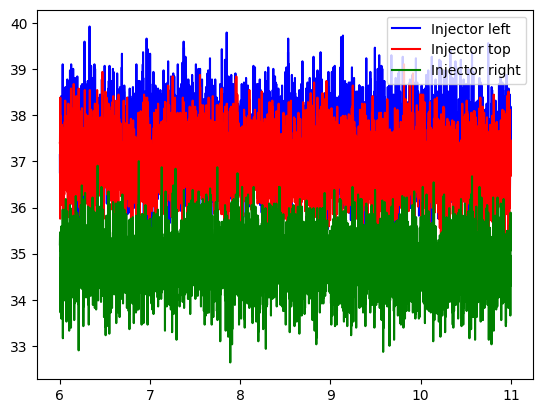

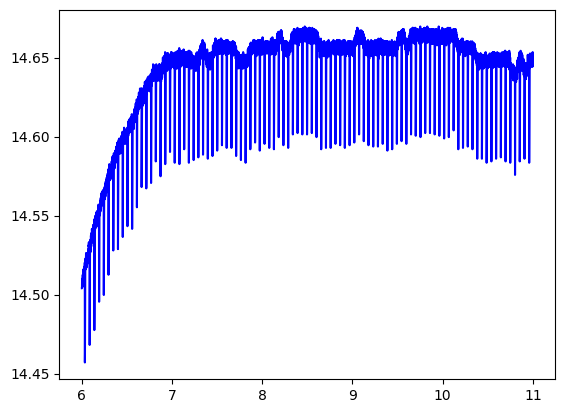

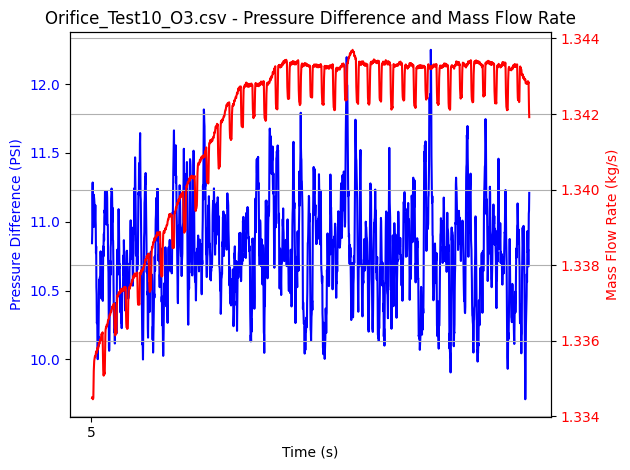

=== Orifice_Test10_O3.csv (Orifice) ===
 Average Cd: 1.5081
 Average Cv: 6.4982
 Average Pressure Difference: 10.7938 psi
 Average Mass Flow Rate: 1.3417 kg/s

=== Orifice_Test10_O3.csv (Injector) ===
 Average Cd (Injector): 0.8136
 Average Cv (Injector): 2.4213
 Average Pressure Difference (Injector): 77.2914 psi
 Average Mass Flow Rate: 1.3417 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.7092493417645273


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


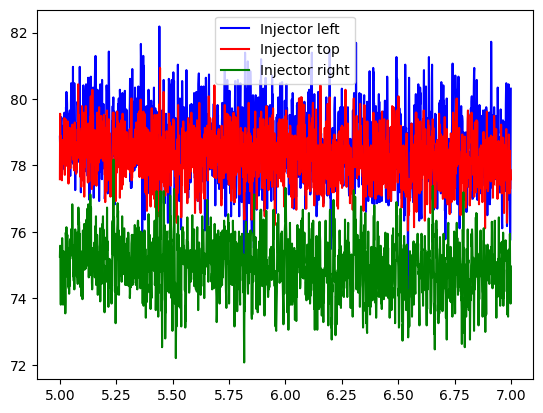

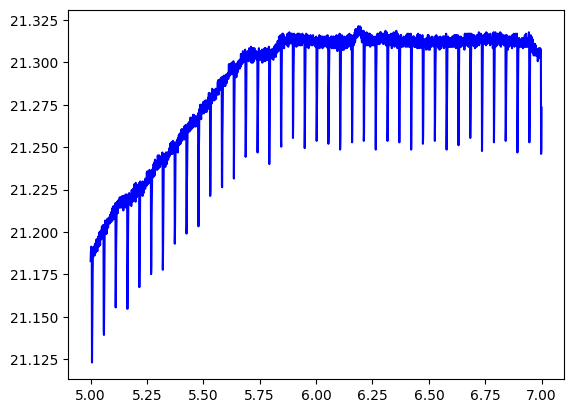

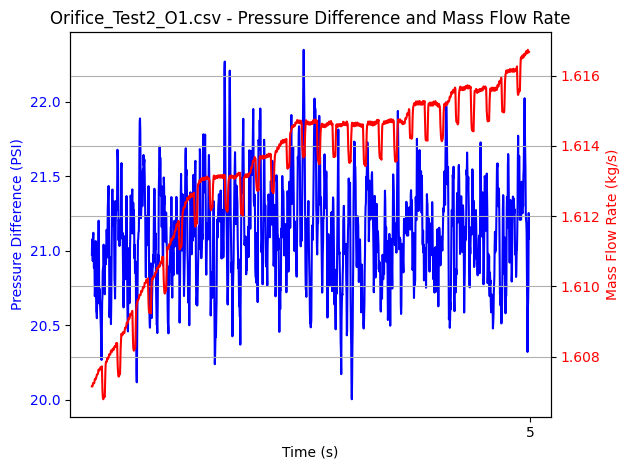

=== Orifice_Test2_O1.csv (Orifice) ===
 Average Cd: 1.2944
 Average Cv: 5.5774
 Average Pressure Difference: 21.1157 psi
 Average Mass Flow Rate: 1.6133 kg/s

=== Orifice_Test2_O1.csv (Injector) ===
 Average Cd (Injector): 0.8067
 Average Cv (Injector): 2.4008
 Average Pressure Difference (Injector): 113.6745 psi
 Average Mass Flow Rate: 1.6133 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.6395502881343597


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


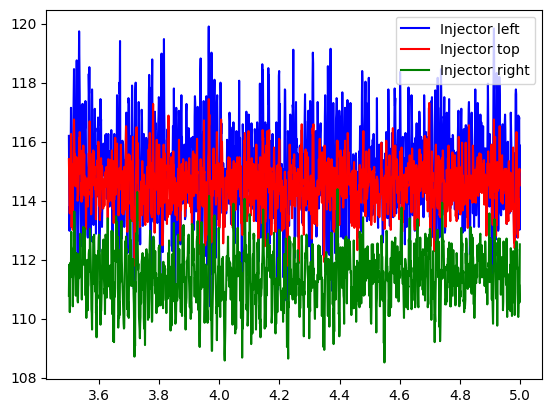

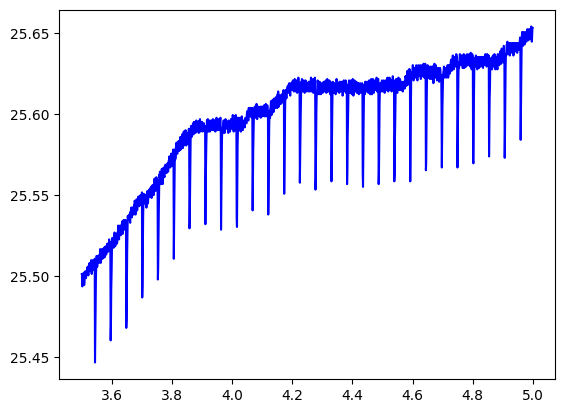

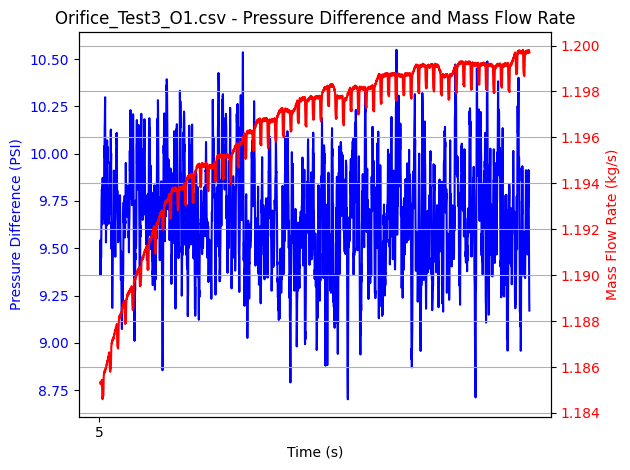

=== Orifice_Test3_O1.csv (Orifice) ===
 Average Cd: 1.4207
 Average Cv: 6.1214
 Average Pressure Difference: 9.6647 psi
 Average Mass Flow Rate: 1.1961 kg/s

=== Orifice_Test3_O1.csv (Injector) ===
 Average Cd (Injector): 0.8095
 Average Cv (Injector): 2.4091
 Average Pressure Difference (Injector): 62.0575 psi
 Average Mass Flow Rate: 1.1961 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.9486200330908637


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


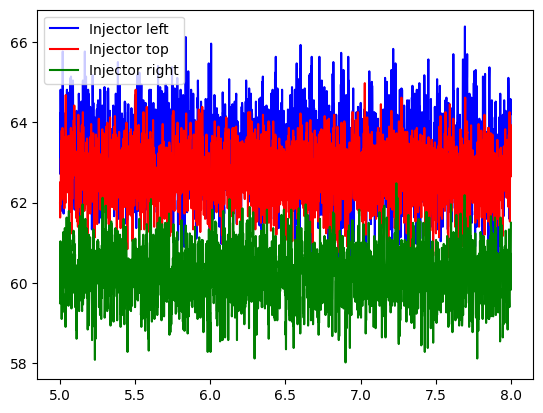

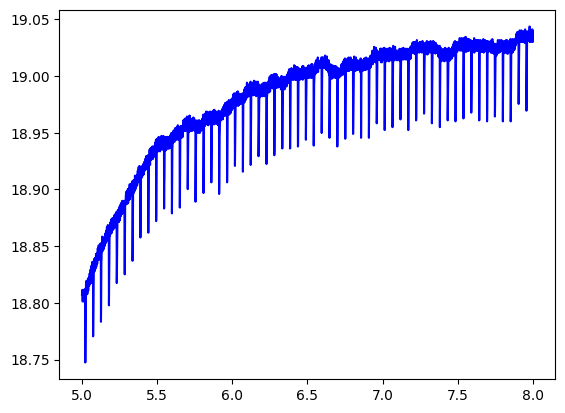

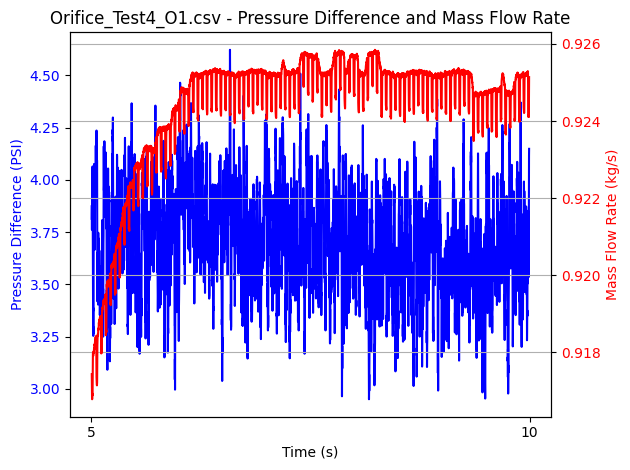

=== Orifice_Test4_O1.csv (Orifice) ===
 Average Cd: 1.7982
 Average Cv: 7.7479
 Average Pressure Difference: 3.7030 psi
 Average Mass Flow Rate: 0.9244 kg/s

=== Orifice_Test4_O1.csv (Injector) ===
 Average Cd (Injector): 0.8105
 Average Cv (Injector): 2.4122
 Average Pressure Difference (Injector): 36.9712 psi
 Average Mass Flow Rate: 0.9244 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 1.222007512902702


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


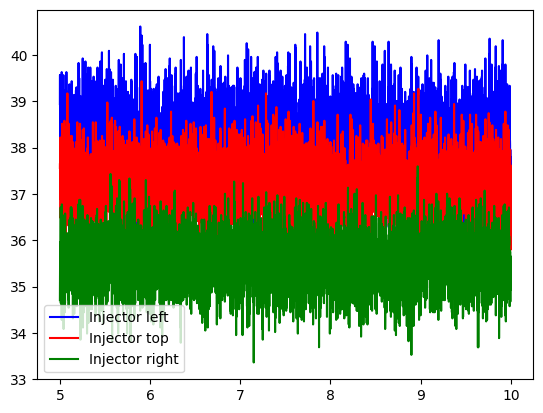

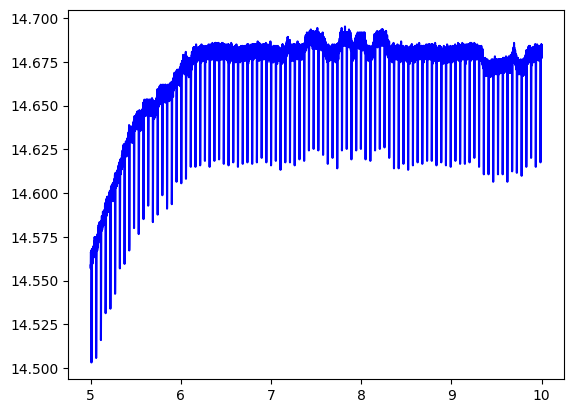

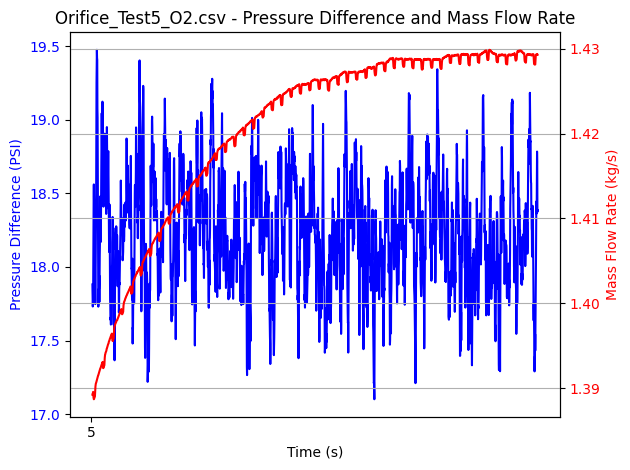

=== Orifice_Test5_O2.csv (Orifice) ===
 Average Cd: 1.1468
 Average Cv: 5.2852
 Average Pressure Difference: 18.2341 psi
 Average Mass Flow Rate: 1.4207 kg/s

=== Orifice_Test5_O2.csv (Injector) ===
 Average Cd (Injector): 0.8046
 Average Cv (Injector): 2.3944
 Average Pressure Difference (Injector): 88.6283 psi
 Average Mass Flow Rate: 1.4207 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.938915478849799


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


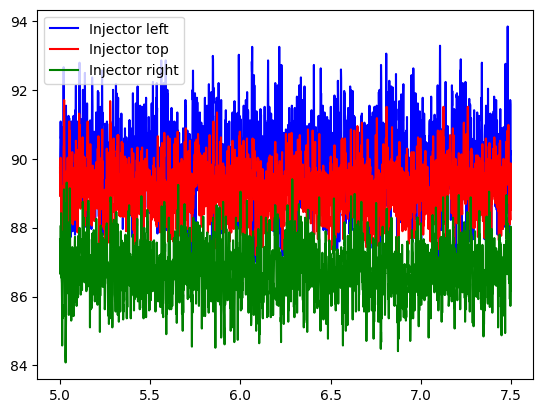

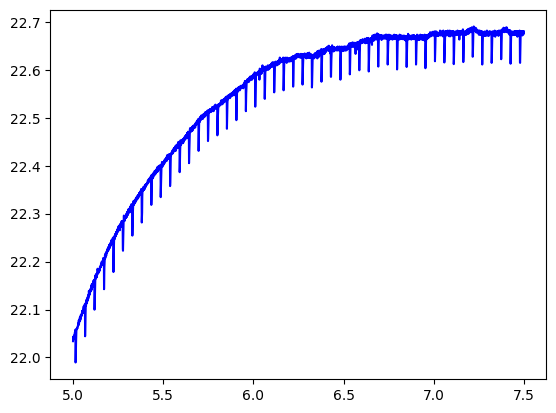

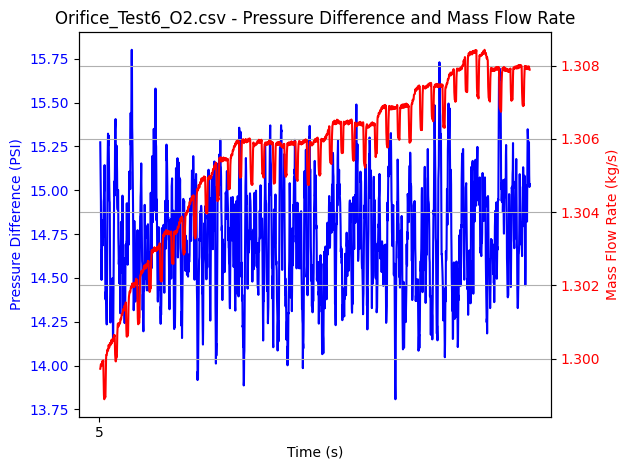

=== Orifice_Test6_O2.csv (Orifice) ===
 Average Cd: 1.1726
 Average Cv: 5.4039
 Average Pressure Difference: 14.7338 psi
 Average Mass Flow Rate: 1.3055 kg/s

=== Orifice_Test6_O2.csv (Injector) ===
 Average Cd (Injector): 0.8111
 Average Cv (Injector): 2.4138
 Average Pressure Difference (Injector): 73.6386 psi
 Average Mass Flow Rate: 1.3055 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.690143967011367


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


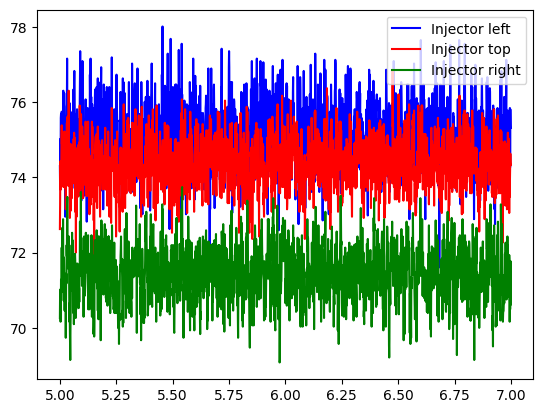

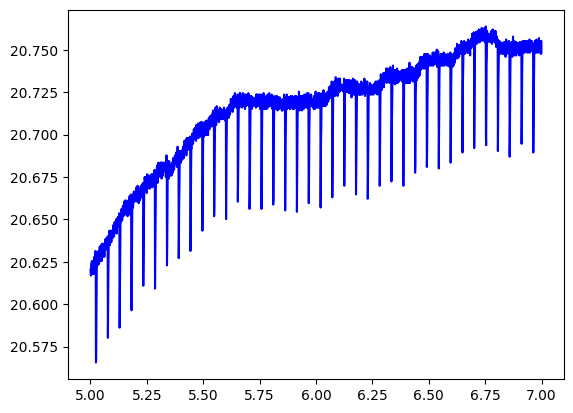

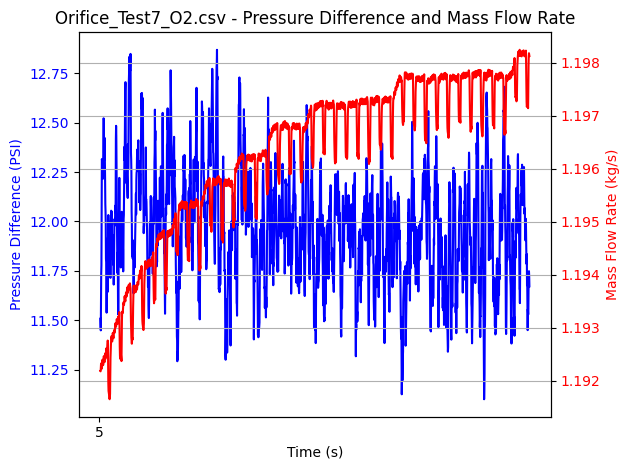

=== Orifice_Test7_O2.csv (Orifice) ===
 Average Cd: 1.1928
 Average Cv: 5.4969
 Average Pressure Difference: 11.9638 psi
 Average Mass Flow Rate: 1.1963 kg/s

=== Orifice_Test7_O2.csv (Injector) ===
 Average Cd (Injector): 0.8132
 Average Cv (Injector): 2.4201
 Average Pressure Difference (Injector): 61.5091 psi
 Average Mass Flow Rate: 1.1963 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.6323827489055378


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


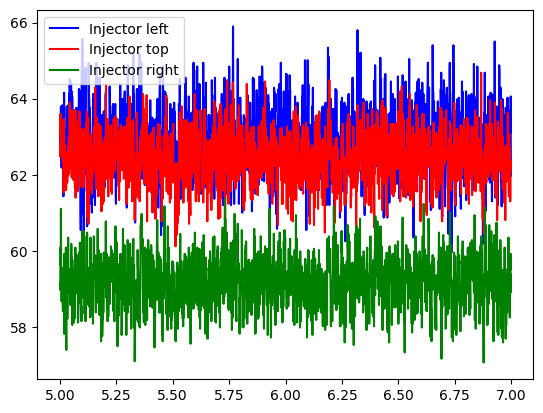

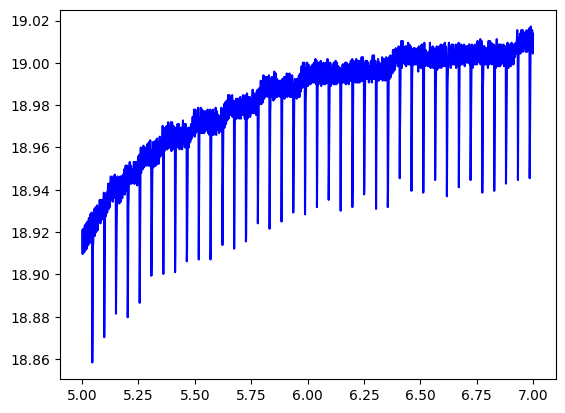

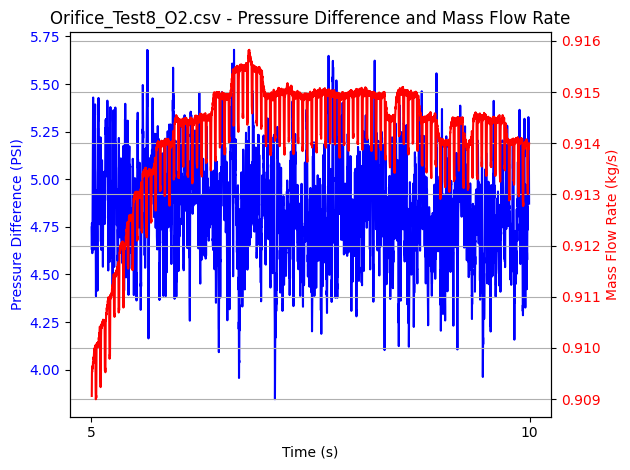

=== Orifice_Test8_O2.csv (Orifice) ===
 Average Cd: 1.4442
 Average Cv: 6.6556
 Average Pressure Difference: 4.8351 psi
 Average Mass Flow Rate: 0.9141 kg/s

=== Orifice_Test8_O2.csv (Injector) ===
 Average Cd (Injector): 0.8135
 Average Cv (Injector): 2.4209
 Average Pressure Difference (Injector): 35.8920 psi
 Average Mass Flow Rate: 0.9141 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 1.2083960007037855


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


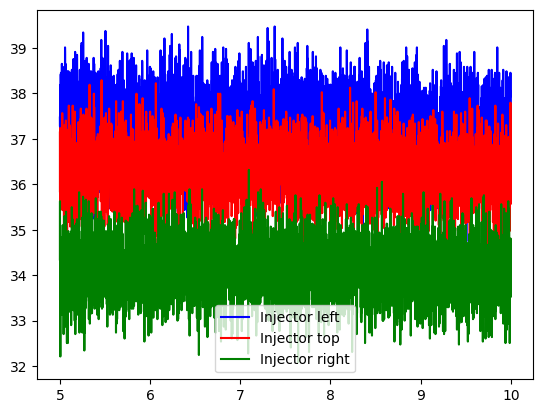

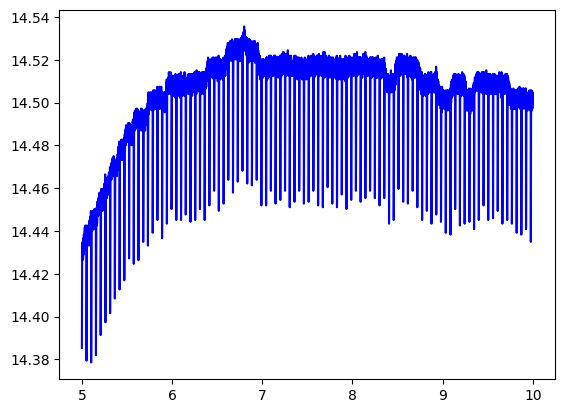

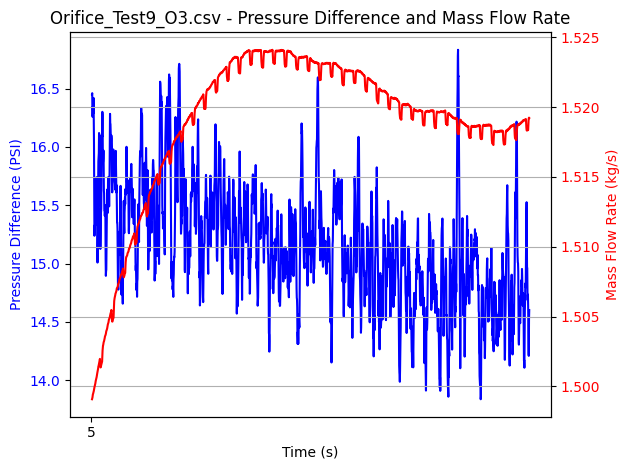

=== Orifice_Test9_O3.csv (Orifice) ===
 Average Cd: 1.2797
 Average Cv: 6.2014
 Average Pressure Difference: 15.1626 psi
 Average Mass Flow Rate: 1.5188 kg/s

=== Orifice_Test9_O3.csv (Injector) ===
 Average Cd (Injector): 0.8095
 Average Cv (Injector): 2.4092
 Average Pressure Difference (Injector): 100.0638 psi
 Average Mass Flow Rate: 1.5188 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.8029302210680704


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


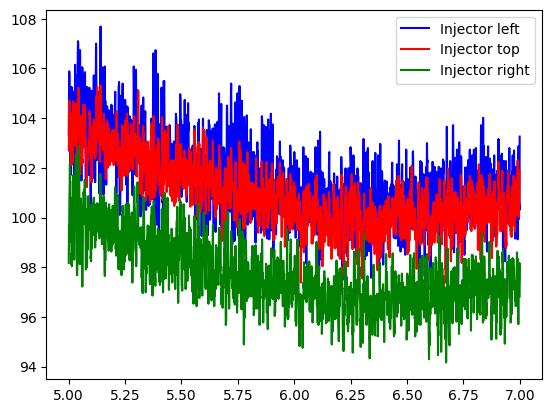

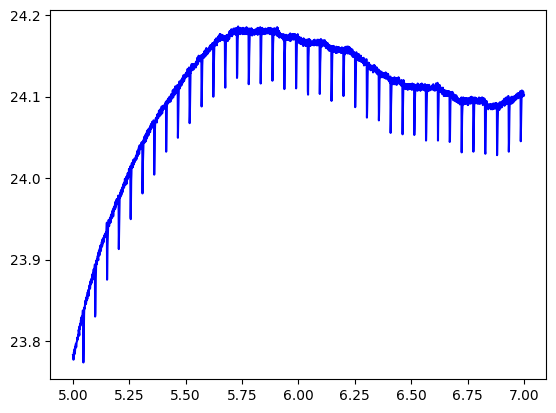

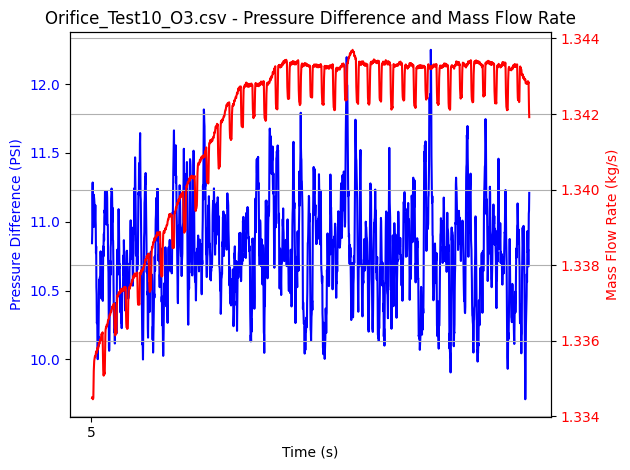

=== Orifice_Test10_O3.csv (Orifice) ===
 Average Cd: 1.3409
 Average Cv: 6.4982
 Average Pressure Difference: 10.7938 psi
 Average Mass Flow Rate: 1.3417 kg/s

=== Orifice_Test10_O3.csv (Injector) ===
 Average Cd (Injector): 0.8136
 Average Cv (Injector): 2.4213
 Average Pressure Difference (Injector): 77.2914 psi
 Average Mass Flow Rate: 1.3417 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.7092493417645273


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


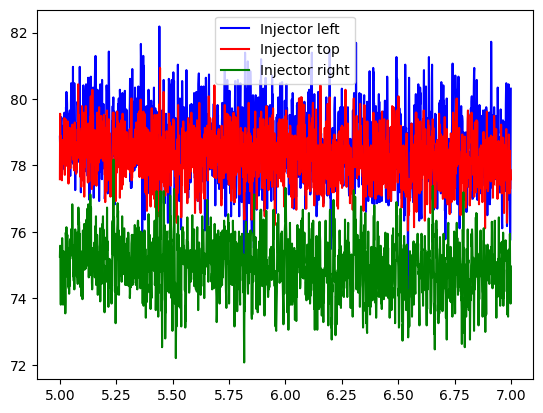

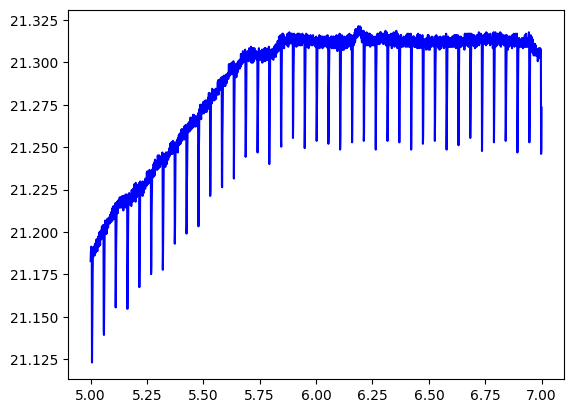

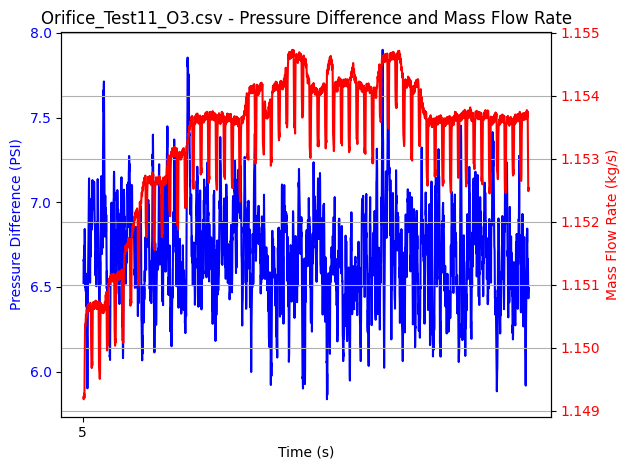

=== Orifice_Test11_O3.csv (Orifice) ===
 Average Cd: 1.4679
 Average Cv: 7.1134
 Average Pressure Difference: 6.6876 psi
 Average Mass Flow Rate: 1.1533 kg/s

=== Orifice_Test11_O3.csv (Injector) ===
 Average Cd (Injector): 0.8138
 Average Cv (Injector): 2.4217
 Average Pressure Difference (Injector): 57.0918 psi
 Average Mass Flow Rate: 1.1533 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 0.9146671490307853


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes
/Users/santiagoulloa/Desktop/RP_PROP/Analysis Scripts/propulsion_analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/santiagoulloa/Desktop/RP_PROP/Analysis Scripts/propulsion_analysis/.venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


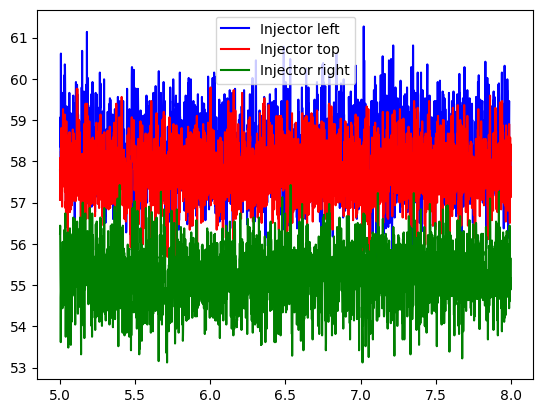

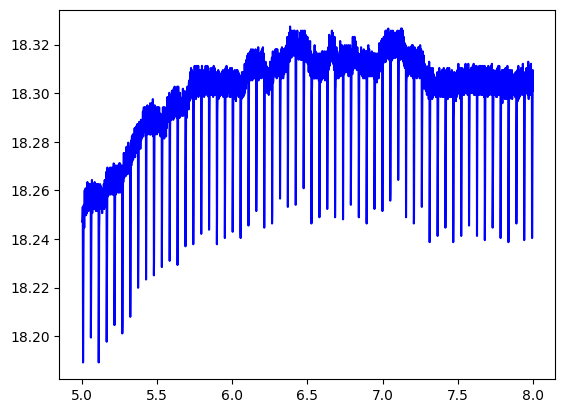

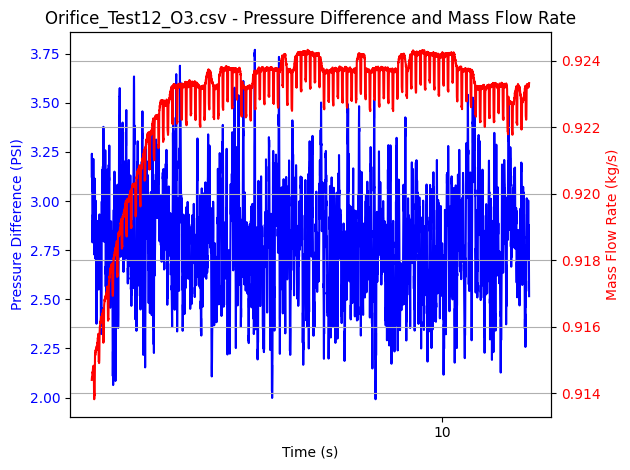

=== Orifice_Test12_O3.csv (Orifice) ===
 Average Cd: 1.8613
 Average Cv: 9.0199
 Average Pressure Difference: 2.7993 psi
 Average Mass Flow Rate: 0.9228 kg/s

=== Orifice_Test12_O3.csv (Injector) ===
 Average Cd (Injector): 0.8152
 Average Cv (Injector): 2.4261
 Average Pressure Difference (Injector): 36.4196 psi
 Average Mass Flow Rate: 0.9228 kg/s

ahhh - 5.053657176928476e-05
Total gallons: 1.2198669993824098


/var/folders/vs/_2nmjzfj3_30_3pmq2fmt4m40000gn/T/ipykernel_15411/3660740101.py:137: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes


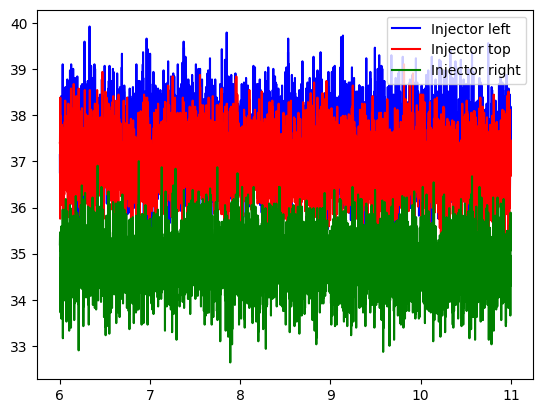

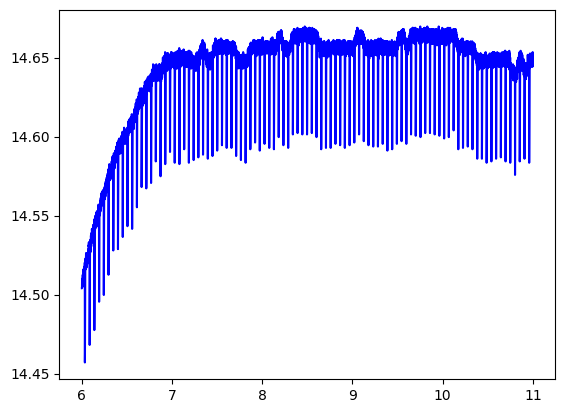

In [24]:
# Process and plot orifices wuth the pintle
def process_and_plot_orifices_test_pintle(clipped_dfs, orifice_diameters, injector_area, window_size=50):

    # orifice dataframes
    avg_cds = np.array([])   # orifice data 
    avg_cvs = np.array([])   # orifice data 
    avg_dps = np.array([])   # orifice data 
    avg_mdots = np.array([]) # orifice data 

    # injector dataframes
    avg_cds_inj = np.array([])   # injector data
    avg_cvs_inj = np.array([])   # injector data
    avg_dps_inj = np.array([])   # injector data
    avg_mdots_inj = np.array([]) # injector data


    for test_name, (start, stop) in steady_state_ranges.items():
        matching_files = glob.glob(f"{Data_Folder}/{test_name}*.csv")
        if not matching_files:
            print(f"No files found for pattern: {test_name}")
            continue

        for file in matching_files:
            key = os.path.basename(file)
            if key not in clipped_dfs:
                print(f"No matching DataFrame for {key}, skipping.")
                continue

            df = clipped_dfs[key].copy()

            diameter = orifice_diameters.get(test_name, None)
            if diameter is None:
                print(f"No orifice diameter defined for {test_name}, skipping.")
                continue

            mean_injector_out = mean = df[['Pintle Left', 'Pintle Top', 'Pintle Right']].mean(axis=1)

            # Orifice Stuffs
            # Convert diameter to meters and calculate area for orifice
            diameter_m = diameter * 0.0254  # Convert inches to meters
            area = math.pi * (diameter_m / 2) ** 2

            # Calculate pressure difference (convert PSI to Pa)
            df.loc[:, "Pressure Difference (psi)"] = (df["Line Pressure"] - mean_injector_out)
            df.loc[:, "Pressure Difference (Pa)"] = df["Pressure Difference (psi)"] * 6894.76

            # Convert Flow Meter GPM to Mass Flow Rate (kg/s)
            df.loc[:, "Mass Flow Rate (kg/s)"] = df["Flow Meter"].apply(gpm_to_mdot)

            # Density of water at ambient conditions
            density = CP.PropsSI('D', 'T', 288.7, 'P', 101325, 'Water') # kg/s

            # Calculate Cd and Cv
            df.loc[:, "Cd"] = df["Mass Flow Rate (kg/s)"] / (area * np.sqrt(2 * density * df["Pressure Difference (Pa)"]))
            df.loc[:, "Cv"] = df["Flow Meter"] / np.sqrt(df["Pressure Difference (psi)"] / 1)

            # Smooth the data using a moving average
            df.loc[:, "Smoothed Pressure Difference (psi)"] = moving_average(df["Pressure Difference (psi)"], window_size)
            df.loc[:, "Smoothed Mass Flow Rate (kg/s)"] = moving_average(df["Mass Flow Rate (kg/s)"], window_size)

            # Calculate pressure difference (convert PSI to Pa)
            df.loc[:, "Injector Pressure Difference (psi)"] = mean_injector_out
            df.loc[:, "Injector Pressure Difference (Pa)"] = df["Injector Pressure Difference (psi)"] * 6894.76

            # Calculate Cd and Cv
            df.loc[:, "Cd Injector"] = df["Mass Flow Rate (kg/s)"] / (injector_area * np.sqrt(2 * density * df["Injector Pressure Difference (Pa)"]))
            df.loc[:, "Cv Injector"] = df["Flow Meter"] / np.sqrt(df["Injector Pressure Difference (psi)"] / 1)
            # ref https://www.emerson.com/documents/automation/manual-valve-sizing-standardized-method-fisher-en-140724.pdf

            # Smooth the data using a moving average
            df.loc[:, "Injector Smoothed Pressure Difference (psi)"] = moving_average(df["Injector Pressure Difference (psi)"], window_size)
            

            # Plot Pressure Difference and Mass Flow Rate
            fig, ax1 = plt.subplots()

            # Plot Smoothed Pressure Difference
            ax1.plot(df["Time (s)"], df["Smoothed Pressure Difference (psi)"], 'b-', label="Pressure Difference (PSI)")
            ax1.set_xlabel("Time (s)")
            ax1.set_ylabel("Pressure Difference (PSI)", color='b')
            ax1.tick_params(axis='y', labelcolor='b')
            ax1.xaxis.set_major_locator(ticker.MultipleLocator(5))

            # Plot Smoothed Mass Flow Rate on Secondary Axis
            ax2 = ax1.twinx()
            ax2.plot(df["Time (s)"], df["Smoothed Mass Flow Rate (kg/s)"], 'r-', label="Mass Flow Rate")
            ax2.set_ylabel("Mass Flow Rate (kg/s)", color='r')
            ax2.tick_params(axis='y', labelcolor='r')
            
            plt.title(f"{key} - Pressure Difference and Mass Flow Rate")
            fig.tight_layout()
            plt.grid()
            plt.show()

            # Print Average Cd, Cv, and Pressure Difference
            avg_cd = df["Cd"].mean()
            avg_cv = df["Cv"].mean()
            avg_dp = df["Pressure Difference (psi)"].mean()
            avg_mdot = df["Mass Flow Rate (kg/s)"].mean()

            avg_cds = np.append(avg_cds, avg_cd)
            avg_cvs = np.append(avg_cvs, avg_cv)
            avg_dps = np.append(avg_dps, avg_dp)
            avg_mdots = np.append(avg_mdots, df["Mass Flow Rate (kg/s)"].mean())

            print(f"=== {key} (Orifice) ===")
            print(f" Average Cd: {avg_cd:.4f}")
            print(f" Average Cv: {avg_cv:.4f}")
            print(f" Average Pressure Difference: {avg_dp:.4f} psi")
            print(f" Average Mass Flow Rate: {avg_mdot:.4f} kg/s\n")

            avg_cd_inj = df["Cd Injector"].mean()
            avg_cv_inj = df["Cv Injector"].mean()
            avg_dp_inj = df["Injector Pressure Difference (psi)"].mean()

            print(f"=== {key} (Injector) ===")
            print(f" Average Cd (Injector): {avg_cd_inj:.4f}")
            print(f" Average Cv (Injector): {avg_cv_inj:.4f}")
            print(f" Average Pressure Difference (Injector): {avg_dp_inj:.4f} psi")
            print(f" Average Mass Flow Rate: {avg_mdot:.4f} kg/s\n")

            avg_cds_inj = np.append(avg_cds_inj, avg_cd_inj)
            avg_cvs_inj = np.append(avg_cvs_inj, avg_cv_inj)
            avg_dps_inj = np.append(avg_dps_inj, avg_dp_inj)
            
            #plot all injector data
            fig, ax1 = plt.subplots()
            plt.plot(df["Time (s)"], df["Pintle Left"], 'b-', label="Injector left")
            plt.plot(df["Time (s)"], df["Pintle Top"], 'r-', label="Injector top")
            plt.plot(df["Time (s)"], df["Pintle Right"], 'g-', label="Injector right")
            plt.legend()
            print(f"ahhh - {injector_area}")

            # intgrate under flowrate curve to get total gallons 
            Q = df["Flow Meter"].values
            time = df["Time (s)"].values
            total_gallons = np.trapz(Q, x=time) / 60  # Convert seconds to minutes

            print(f"Total gallons: {total_gallons}")
            fig, ax1 = plt.subplots()
            # plot the flow rate
            plt.plot(time, Q, 'b-', label="Flow rate")

    # Return aggregated average arrays
    return (avg_cds, avg_cvs, avg_dps, avg_mdots,
            avg_cds_inj, avg_cvs_inj, avg_dps_inj)

injector_area = ((np.pi * (0.0276 / 2)**2) * 20) +  ((np.pi * (0.065 / 2)**2) * 20) 
lox_rho = CP.PropsSI('D', 'T', Q_(-297, 'degF').to('K').magnitude, 'P', Q_(420, 'psi').to('pascal').magnitude, 'Oxygen')
A_total_fuel  = (1.91 - 0.8736) / ( 0.65 * (np.sqrt( 2 * lox_rho * Q_(70, 'psi').to('pascal').magnitude ) ) )# % m^2 
injector_area = Q_(injector_area, 'in^2').to('m^2').magnitude

print(A_total_fuel)
print(injector_area)


avg_cds, avg_cvs, avg_dps, avg_mdots, avg_cds_inj, avg_cvs_inj, avg_dps_inj = process_and_plot_orifices_test_pintle(Clipped_dfs, orifice_diameters, injector_area, window_size=10)

### Orifice Plots

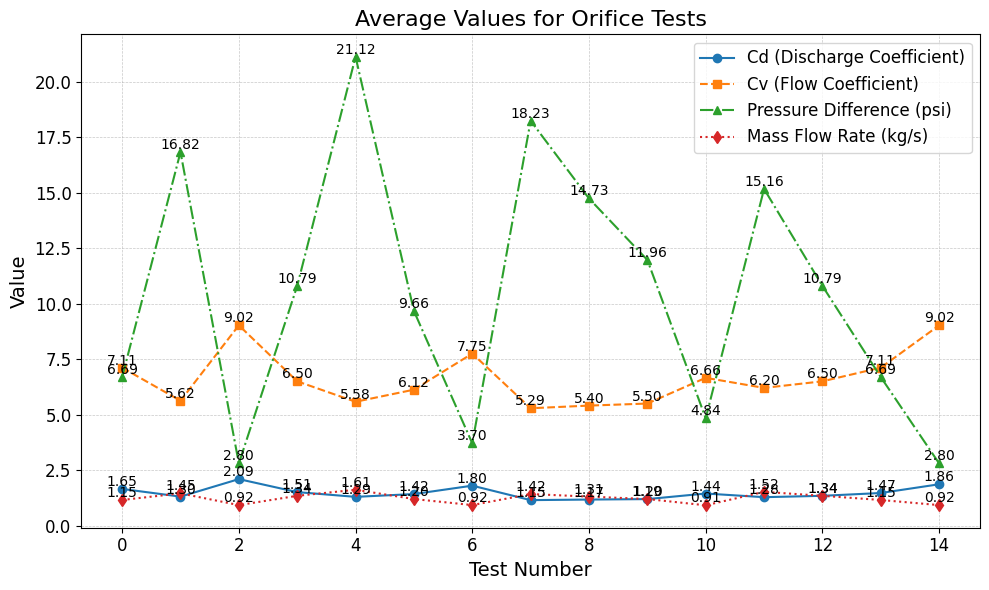

In [25]:
# Improved plot with annotations
plt.figure(figsize=(10, 6))
plt.plot(avg_cds, marker='o', linestyle='-', label="Cd (Discharge Coefficient)")
plt.plot(avg_cvs, marker='s', linestyle='--', label="Cv (Flow Coefficient)")
plt.plot(avg_dps, marker='^', linestyle='-.', label="Pressure Difference (psi)")
plt.plot(avg_mdots, marker='d', linestyle=':', label="Mass Flow Rate (kg/s)")

# Annotate each point with its value
for i, value in enumerate(avg_cds):
    plt.text(i, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom')
for i, value in enumerate(avg_cvs):
    plt.text(i, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom')
for i, value in enumerate(avg_dps):
    plt.text(i, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom')
for i, value in enumerate(avg_mdots):
    plt.text(i, value, f"{value:.2f}", fontsize=10, ha='center', va='bottom')

plt.title("Average Values for Orifice Tests", fontsize=16)
plt.xlabel("Test Number", fontsize=14)
plt.ylabel("Value", fontsize=14)

plt.grid(visible=True, linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc="best")

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.tight_layout()
plt.show()


### Pintle Calcs